# Machine Learning Unsupervised Learning 1
## Individual Assignment - 2
#### Curated by: Paritosh Sinha

###### Importing the Packages

In [5]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np
import threadpoolctl
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## Importing the csv file

In [183]:
input = pd.read_csv("wine-data.csv", delimiter=',')
input.head()

Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue    OD  Proline  
0             5.64  1.04  3.92     1065  
1             4.38  1.05  3.40     1050  
2             5.68  1.03  3.17     1185  
3             7.80  0.86  3.45     1480  
4             4.32  1.04  2.93      735

In [205]:
wine = pd.read_csv("wine-data.csv", delimiter=',')
wine.head()

Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue    OD  Proline  
0             5.64  1.04  3.92     1065  
1             4.38  1.05  3.40     1050  
2             5.68  1.03  3.17     1185  
3             7.80  0.86  3.45     1480  
4             4.32  1.04  2.93      735

## EDA on Dataset 

In [206]:
wine.isnull().sum()

Class                   0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD                      0
Proline                 0
dtype: int64

###### Summary of the Dataframe

In [207]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


###### Statistical Summary of the dataset


In [208]:
wine.describe().T

count        mean         std     min       25%  \
Class                 178.0    1.938202    0.775035    1.00    1.0000   
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic_Acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Alcalinity_of_ash     178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color_intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD                    178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Class                   2.000    3.0000     3.00  
Alcohol                13.050   13.6775    14.83  
Malic_Acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Alcalinity_of_ash      19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid_phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color_intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD                      2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

###### Checking Distribution

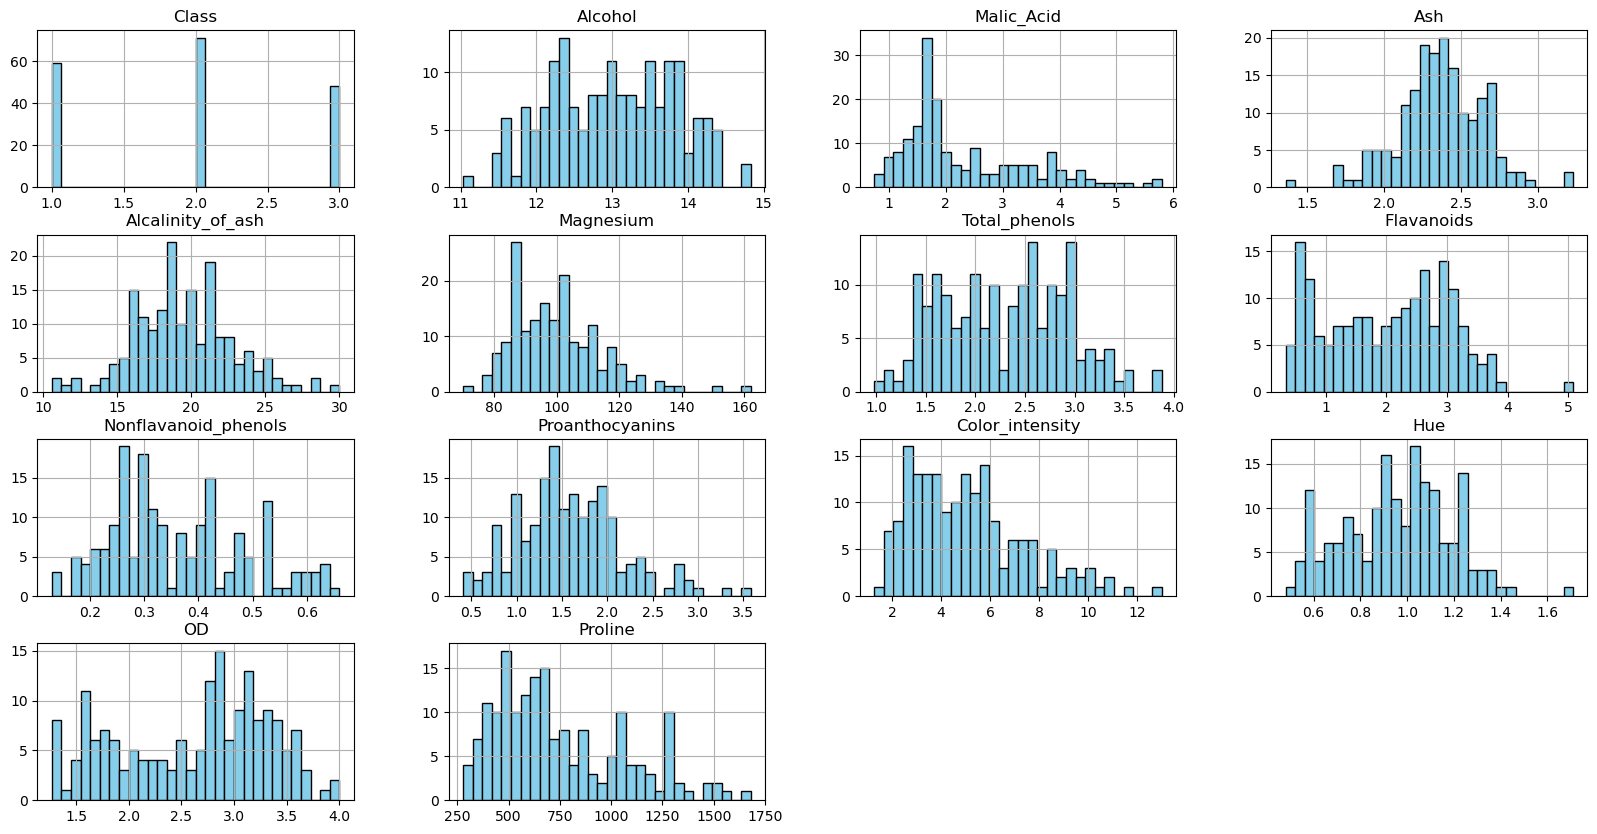

In [209]:
wine.hist(figsize=(20,10),bins=30, color='skyblue', edgecolor='black')
plt.show()

###### Checking Correlation

In [210]:
cormat = wine.corr()
round(cormat,2)

Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_ash  \
Class                  1.00    -0.33        0.44 -0.05               0.52   
Alcohol               -0.33     1.00        0.09  0.21              -0.31   
Malic_Acid             0.44     0.09        1.00  0.16               0.29   
Ash                   -0.05     0.21        0.16  1.00               0.44   
Alcalinity_of_ash      0.52    -0.31        0.29  0.44               1.00   
Magnesium             -0.21     0.27       -0.05  0.29              -0.08   
Total_phenols         -0.72     0.29       -0.34  0.13              -0.32   
Flavanoids            -0.85     0.24       -0.41  0.12              -0.35   
Nonflavanoid_phenols   0.49    -0.16        0.29  0.19               0.36   
Proanthocyanins       -0.50     0.14       -0.22  0.01              -0.20   
Color_intensity        0.27     0.55        0.25  0.26               0.02   
Hue                   -0.62    -0.07       -0.56 -0.07              -0.27   
OD                    -0.79     0.07       -0.37  0.00              -0.28   
Proline               -0.63     0.64       -0.19  0.22              -0.44   

                      Magnesium  Total_phenols  Flavanoids  \
Class                     -0.21          -0.72       -0.85   
Alcohol                    0.27           0.29        0.24   
Malic_Acid                -0.05          -0.34       -0.41   
Ash                        0.29           0.13        0.12   
Alcalinity_of_ash         -0.08          -0.32       -0.35   
Magnesium                  1.00           0.21        0.20   
Total_phenols              0.21           1.00        0.86   
Flavanoids                 0.20           0.86        1.00   
Nonflavanoid_phenols      -0.26          -0.45       -0.54   
Proanthocyanins            0.24           0.61        0.65   
Color_intensity            0.20          -0.06       -0.17   
Hue                        0.06           0.43        0.54   
OD                         0.07           0.70        0.79   
Proline                    0.39           0.50        0.49   

                      Nonflavanoid_phenols  Proanthocyanins  Color_intensity  \
Class                                 0.49            -0.50             0.27   
Alcohol                              -0.16             0.14             0.55   
Malic_Acid                            0.29            -0.22             0.25   
Ash                                   0.19             0.01             0.26   
Alcalinity_of_ash                     0.36            -0.20             0.02   
Magnesium                            -0.26             0.24             0.20   
Total_phenols                        -0.45             0.61            -0.06   
Flavanoids                           -0.54             0.65            -0.17   
Nonflavanoid_phenols                  1.00            -0.37             0.14   
Proanthocyanins                      -0.37             1.00            -0.03   
Color_intensity                       0.14            -0.03             1.00   
Hue                                  -0.26             0.30            -0.52   
OD                                   -0.50             0.52            -0.43   
Proline                              -0.31             0.33             0.32   

                       Hue    OD  Proline  
Class                -0.62 -0.79    -0.63  
Alcohol              -0.07  0.07     0.64  
Malic_Acid           -0.56 -0.37    -0.19  
Ash                  -0.07  0.00     0.22  
Alcalinity_of_ash    -0.27 -0.28    -0.44  
Magnesium             0.06  0.07     0.39  
Total_phenols         0.43  0.70     0.50  
Flavanoids            0.54  0.79     0.49  
Nonflavanoid_phenols -0.26 -0.50    -0.31  
Proanthocyanins       0.30  0.52     0.33  
Color_intensity      -0.52 -0.43     0.32  
Hue                   1.00  0.57     0.24  
OD                    0.57  1.00     0.31  
Proline               0.24  0.31     1.00

## Taking class into y Variable

In [404]:
import pandas as pd
input.head()
y = input['Class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [212]:
wine.drop(wine.columns[[0,]], axis=1, inplace=True) #Dropping Class column
wine.head()

Alcohol  Malic_Acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

     OD  Proline  
0  3.92     1065  
1  3.40     1050  
2  3.17     1185  
3  3.45     1480  
4  2.93      735

## Standardized the Data 
As the all the data is continous and may be on different scales

In [213]:
from sklearn.preprocessing import StandardScaler
scaler_wine = StandardScaler().fit(wine).transform(wine)
print("Standardized Data = ", scaler_wine)

Standardized Data =  [[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [214]:
scaler_wine = pd.DataFrame(scaler_wine,columns= wine.columns)

In [215]:
print(scaler_wine.head().T)
print(scaler_wine.shape)

                             0         1         2         3         4
Alcohol               1.518613  0.246290  0.196879  1.691550  0.295700
Malic_Acid           -0.562250 -0.499413  0.021231 -0.346811  0.227694
Ash                   0.232053 -0.827996  1.109334  0.487926  1.840403
Alcalinity_of_ash    -1.169593 -2.490847 -0.268738 -0.809251  0.451946
Magnesium             1.913905  0.018145  0.088358  0.930918  1.281985
Total_phenols         0.808997  0.568648  0.808997  2.491446  0.808997
Flavanoids            1.034819  0.733629  1.215533  1.466525  0.663351
Nonflavanoid_phenols -0.659563 -0.820719 -0.498407 -0.981875  0.226796
Proanthocyanins       1.224884 -0.544721  2.135968  1.032155  0.401404
Color_intensity       0.251717 -0.293321  0.269020  1.186068 -0.319276
Hue                   0.362177  0.406051  0.318304 -0.427544  0.362177
OD                    1.847920  1.113449  0.788587  1.184071  0.449601
Proline               1.013009  0.965242  1.395148  2.334574 -0.037874
(178, 

### Performing PCA on Scaled dataset

In [400]:
pca_wine_all = PCA(n_components=13).fit(scaler_wine)
pca_wine = PCA(n_components=2).fit(scaler_wine)
x_pca = pca_wine.transform(wine)
print("Variance explained by each of the all_components: ",'\n',pca_wine_all.explained_variance_ratio_)
print("Variance explained by each of the 2_components: ",'\n',pca_wine.explained_variance_ratio_)
print("Total variance explained by the 2_components: ",'\n',sum(pca_wine.explained_variance_ratio_))
print("Weights of the 2_components: ",'\n',pca_wine.components_)

Variance explained by each of the all_components:  
 [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Variance explained by each of the 2_components:  
 [0.36198848 0.1920749 ]
Total variance explained by the 2_components:  
 0.5540633835693531
Weights of the 2_components:  
 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


## Cumulative Explained Variance

([<matplotlib.axis.YTick at 0x1e304961400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

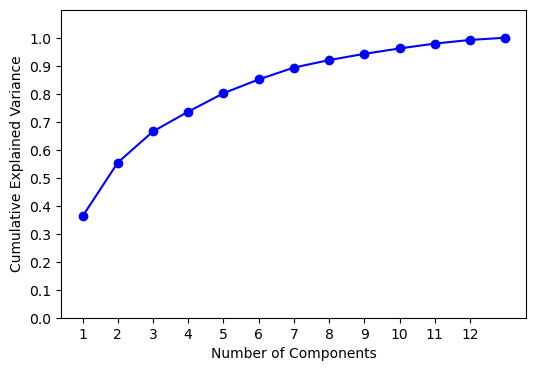

In [235]:
pca = PCA(n_components=None)
train_nums_pca = pca.fit_transform(scaler_wine)
varExp = pca.explained_variance_ratio_
cumVarExplained = []
nb_components = []
counter = 1
for i in varExp:
    cumVarExplained.append(varExp[0:counter].sum())
    nb_components.append(counter)
    counter += 1

plt.subplots(figsize=(6, 4))
plt.plot(nb_components, cumVarExplained, 'bo-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylim([0.0, 1.1])
plt.xticks(np.arange(1, len(nb_components), 1.0))
plt.yticks(np.arange(0.0, 1.1, 0.10))

## Creating Dataframe principalDf with pc1 & pc2 

In [240]:
principalDf = pd.DataFrame(data = x_pca
             , columns = ['pc 1', 'pc 2'])
principalDf

pc 1        pc 2
0    325.637020 -436.868698
1    317.812078 -422.143492
2    355.267740 -472.707109
3    442.477439 -585.573346
4    227.486905 -313.004257
..          ...         ...
173  222.628343 -310.732186
174  226.502009 -315.739704
175  253.624048 -353.684331
176  255.586884 -354.636593
177  170.731645 -246.115609

[178 rows x 2 columns]

In [402]:
dfpc0 = pd.DataFrame({'var':pca_wine.explained_variance_ratio_,
             'PC':['pc 1','pc 2']})
dfpc0.head()

var    PC
0  0.361988  pc 1
1  0.192075  pc 2

### Plotting PCA against Class Variable

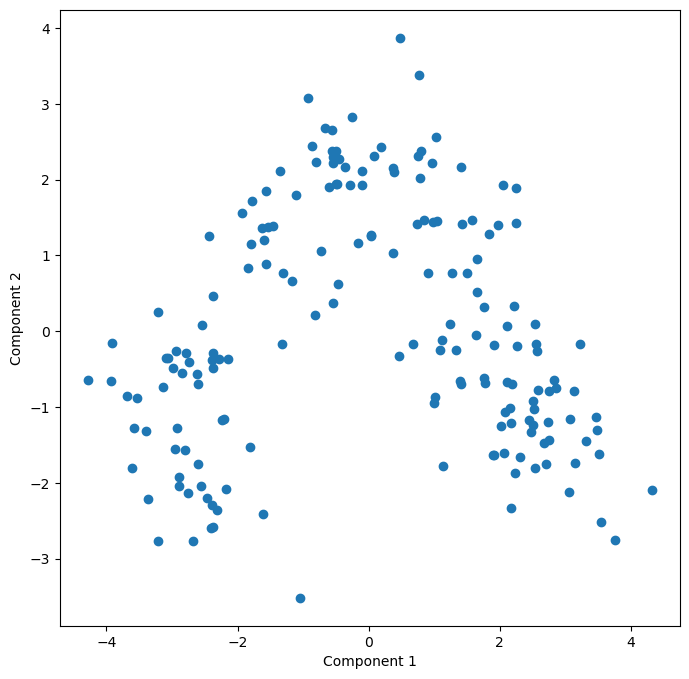

In [419]:
pca_wine_1 = PCA(n_components=2).fit_transform(scaler_wine)

plt.figure(figsize=(8, 8))
plt.scatter(pca_wine_1[:, 0], pca_wine_1[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [421]:
# Put principal components into a data frame so we can plot it.
dfpc = pd.DataFrame(pca_wine_1, columns=['pc 1', 'pc 2'])
dfpc['class'] = y

### Plotting PCA with Class Variable

<Figure size 1000x1000 with 0 Axes>

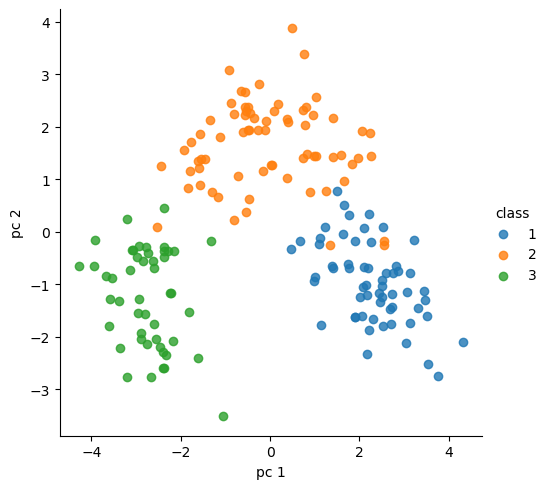

In [422]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=dfpc, x="pc 1", y="pc 2", fit_reg=False, hue='class')
plt.show()

## Creating Biplot 

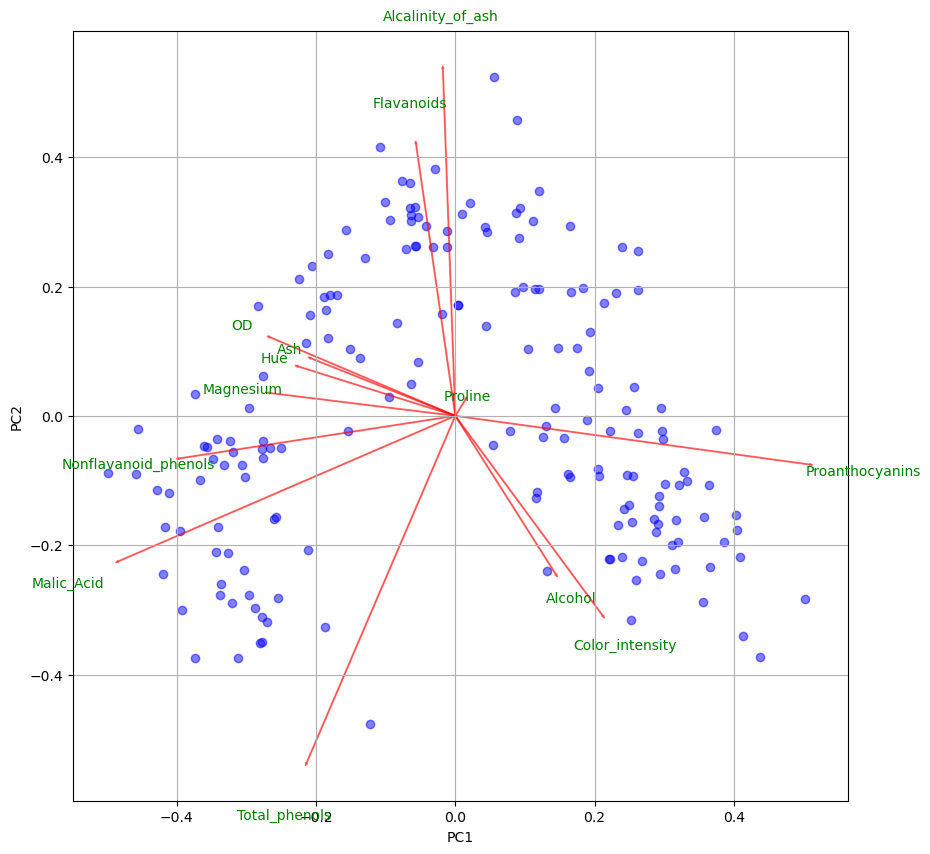

In [432]:
import matplotlib.pyplot as plt


def biplot(score, coeff, labels):
    plt.figure(figsize=(10, 10))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='b', alpha=0.5)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
            
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.show()

# Assuming you have performed PCA and obtained the results stored in 'pca' object
coeff = pca_wine_all.components_
score = pca_wine_all.fit_transform(scaler_wine)
labels = scaler_wine.columns.values.tolist()
biplot(score, coeff,labels)


In [244]:
from sklearn.cluster import KMeans
import threadpoolctl

### Implementing Elbow Graph on K-means on PCA Data

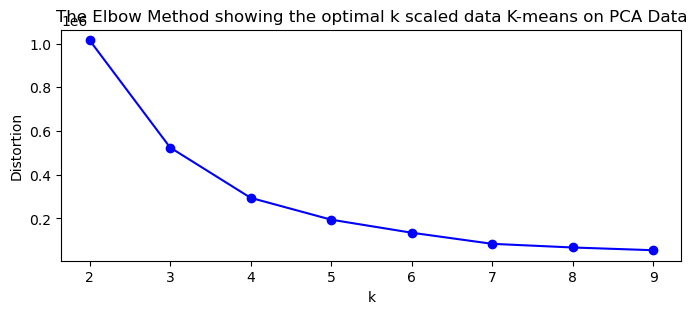

In [330]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDf)
    distortions.append(kmeanModel.inertia_) 
plt.figure(figsize=(8,3))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k scaled data K-means on PCA Data')
plt.show()

### Implementing K-means on PCA Data

In [363]:
fit = KMeans(n_clusters=4, max_iter = 10, random_state=0).fit(principalDf)
fit.labels_  # A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
fit.cluster_centers_ # A matrix of cluster centres.
fit.n_iter_ # The number of (outer) iterations.
fit.inertia_

294156.231958984

## Ploting the PCA data using K-means 4 clusters 

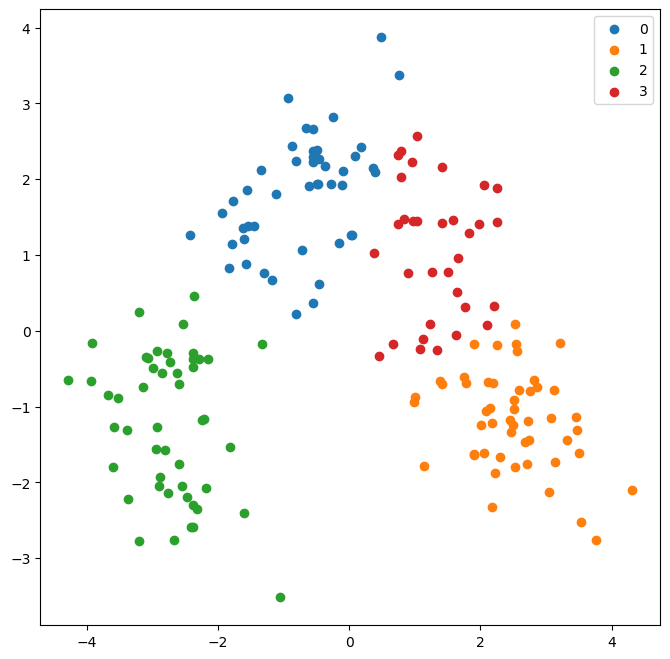

In [247]:
pca_wine_1=PCA(n_components=2).fit_transform(scaler_wine)
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(pca_wine_1)
plt.figure(figsize=(8,8))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(pca_wine_1[label == i , 0] , pca_wine_1[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

### Creation of new csv file and Aggregating columns on clusters on kmeans on PCA Data

In [248]:
pca_wine_for_kmeans=principalDf.copy()
pca_wine_for_kmeans.head()

pc 1        pc 2
0  325.637020 -436.868698
1  317.812078 -422.143492
2  355.267740 -472.707109
3  442.477439 -585.573346
4  227.486905 -313.004257

In [249]:
pca_wine_for_ward=principalDf.copy()
pca_wine_for_ward.head()

pc 1        pc 2
0  325.637020 -436.868698
1  317.812078 -422.143492
2  355.267740 -472.707109
3  442.477439 -585.573346
4  227.486905 -313.004257

In [250]:
WinePCAWithClusterMembership = pca_wine_for_kmeans
WinePCAWithClusterMembership['Class'] = y
WinePCAWithClusterMembership['fit$cluster'] = fit.labels_
WinePCAWithClusterMembership.head()

pc 1        pc 2  Class  fit$cluster
0  325.637020 -436.868698      1            1
1  317.812078 -422.143492      1            1
2  355.267740 -472.707109      1            2
3  442.477439 -585.573346      1            2
4  227.486905 -313.004257      1            3

In [251]:
print('Count in each cluster: \n', WinePCAWithClusterMembership['fit$cluster'].value_counts())

Count in each cluster: 
 3    58
0    58
1    39
2    23
Name: fit$cluster, dtype: int64


In [253]:
WinePCAWithClusterMembership.to_csv("wine_pca_kmeans_labeled.csv",encoding="utf-8")

In [254]:
cluster1 = WinePCAWithClusterMembership.loc[WinePCAWithClusterMembership['fit$cluster']==0,]
cluster1.iloc[::,0] 
cluster2 = WinePCAWithClusterMembership.loc[WinePCAWithClusterMembership['fit$cluster']==1,]
cluster2.iloc[::,0] 
cluster3 = WinePCAWithClusterMembership.loc[WinePCAWithClusterMembership['fit$cluster']==2,]
cluster3.iloc[::,0]  
cluster4 = WinePCAWithClusterMembership.loc[WinePCAWithClusterMembership['fit$cluster']==3,]
cluster4.iloc[::,0] 

4      227.486905
20     243.683101
21     235.507386
39     238.218493
40     246.513860
43     209.923389
60     208.928582
62     194.028648
65     208.912927
68     230.568376
69     228.070542
78     235.541022
81     217.435929
82     190.440742
87     171.814202
88     205.766617
89     188.142962
96     196.688592
98     203.309580
100    217.766116
101    173.326186
104    204.677677
109    209.178002
110    176.833632
112    187.599424
119    173.689749
120    193.151251
129    175.926564
130    196.893447
132    171.327036
133    184.579415
134    197.321955
135    210.630301
136    215.873733
138    176.572008
139    180.805272
140    183.414382
141    234.308071
147    188.265236
148    196.797009
149    170.776785
153    205.408586
154    196.046908
155    217.750665
158    200.942440
159    188.420967
161    208.078557
162    175.866552
163    206.613280
164    186.185813
166    211.860112
167    206.283699
168    226.894369
169    192.996833
172    199.998544
173    222

In [255]:
#Aggregating columns on clusters
WinePCAWithClusterMembership.groupby('fit$cluster').agg({'pc 1':'mean','pc 2':'mean','Class':'mean'}).T


fit$cluster           0           1           2           3
pc 1         137.619016  298.508111  400.262274  202.481111
pc 2        -195.839140 -401.686168 -530.702427 -281.076975
Class          2.224138    1.358974    1.000000    2.413793

### Implementing Elbow Graph on K-means without PCA on scaled data of all chemical measurements

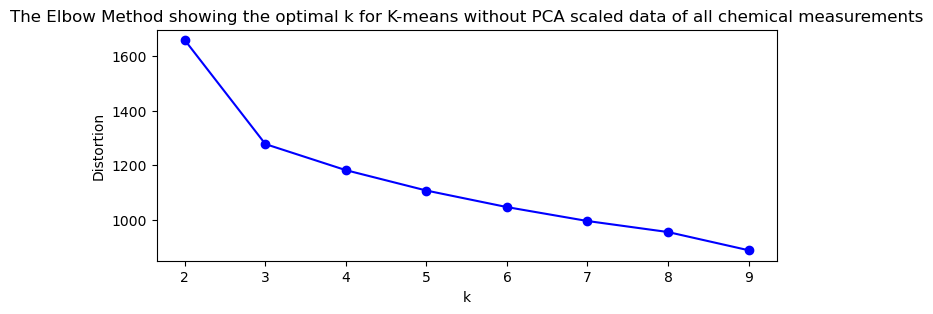

In [331]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaler_wine)
    distortions.append(kmeanModel.inertia_) 
plt.figure(figsize=(8,3))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for K-means without PCA scaled data of all chemical measurements')
plt.show()

### Implementing K-means without PCA on scaled data of all chemical measurements

In [359]:
fit = KMeans(n_clusters=4, max_iter = 10, random_state=0).fit(scaler_wine)
fit.labels_  # A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
fit.cluster_centers_ # A matrix of cluster centres.
fit.n_iter_ # The number of (outer) iterations.
fit.inertia_ 


1175.705192819712

### Creation of new csv file and Aggregating columns on clusters on kmeans on scaled data of all chemical measurements

In [258]:
WineNonPCAWithClusterMembership = input.copy()
WineNonPCAWithClusterMembership['fit$cluster'] = fit.labels_
WineNonPCAWithClusterMembership.head()

Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue    OD  Proline  fit$cluster  
0             5.64  1.04  3.92     1065            0  
1             4.38  1.05  3.40     1050            0  
2             5.68  1.03  3.17     1185            0  
3             7.80  0.86  3.45     1480            0  
4             4.32  1.04  2.93      735            2

In [259]:
print('Count in each cluster: \n', WineNonPCAWithClusterMembership['fit$cluster'].value_counts())

Count in each cluster: 
 0    54
1    49
3    44
2    31
Name: fit$cluster, dtype: int64


In [260]:
WineNonPCAWithClusterMembership.to_csv("wine_non_pca_kmeans_labeled.csv",encoding="utf-8")

In [261]:
cluster1 = WineNonPCAWithClusterMembership.loc[WineNonPCAWithClusterMembership['fit$cluster']==0,]
cluster1.iloc[::,0] 
cluster2 = WineNonPCAWithClusterMembership.loc[WineNonPCAWithClusterMembership['fit$cluster']==1,]
cluster2.iloc[::,0] 
cluster3 = WineNonPCAWithClusterMembership.loc[WineNonPCAWithClusterMembership['fit$cluster']==2,]
cluster3.iloc[::,0]  
cluster4 = WineNonPCAWithClusterMembership.loc[WineNonPCAWithClusterMembership['fit$cluster']==3,]
cluster4.iloc[::,0] 

59     2
60     2
61     2
62     2
64     2
67     2
68     2
70     2
72     2
75     2
76     2
77     2
80     2
82     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
97     2
100    2
101    2
103    2
104    2
105    2
106    2
107    2
108    2
111    2
112    2
113    2
114    2
115    2
116    2
117    2
118    2
119    2
125    2
127    2
128    2
129    2
Name: Class, dtype: int64

In [262]:
#Aggregating columns on clusters
WineNonPCAWithClusterMembership.groupby('fit$cluster').agg({'Class':'mean','Alcohol':'mean','Malic_Acid':'mean','Ash':'mean','Alcalinity_of_ash':'mean','Magnesium':'mean','Total_phenols':'mean','Flavanoids':'mean','Nonflavanoid_phenols':'mean','Proanthocyanins':'mean','Color_intensity':'mean','Hue':'mean','OD':'mean','Proline':'mean'}).T


fit$cluster                     0           1           2           3
Class                    1.000000    2.979592    1.838710    2.000000
Alcohol                 13.795926   13.151633   12.434194   12.255455
Malic_Acid               1.933333    3.344490    2.301935    1.732500
Ash                      2.430370    2.434694    2.400968    2.187955
Alcalinity_of_ash       16.724074   21.438776   20.454839   20.054545
Magnesium              106.129630   99.020408  104.129032   89.613636
Total_phenols            2.862222    1.678163    2.691613    2.006818
Flavanoids               3.017407    0.797959    2.619677    1.771818
Nonflavanoid_phenols     0.285185    0.450816    0.291613    0.406364
Proanthocyanins          1.907778    1.163061    2.080645    1.333409
Color_intensity          5.664630    7.343265    3.440645    2.908409
Hue                      1.065185    0.685918    1.032903    1.074455
OD                       3.145185    1.690204    3.074839    2.656818
Proline               1147.537037  627.551020  594.064516  495.772727

### Implementing Single Hierarichal Clustering on PCA Data

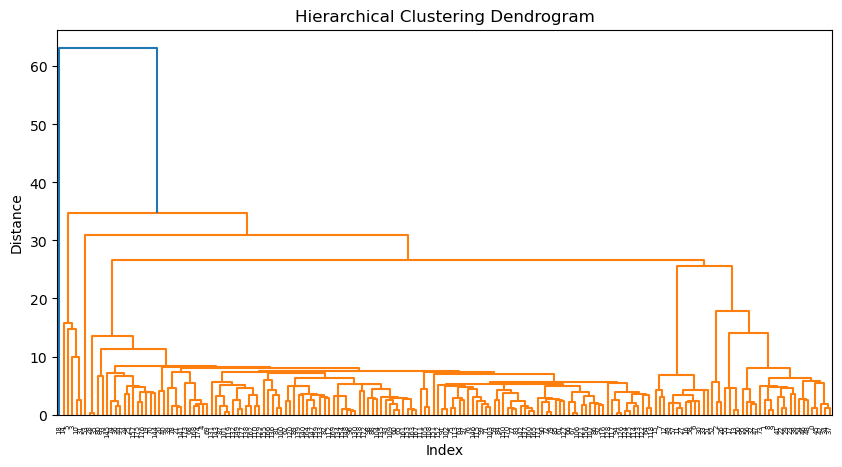

In [263]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(principalDf, method='single',metric='euclidean'))

### Implementing Single Hierarichal Clustering on scaled Data of all chemical measurements

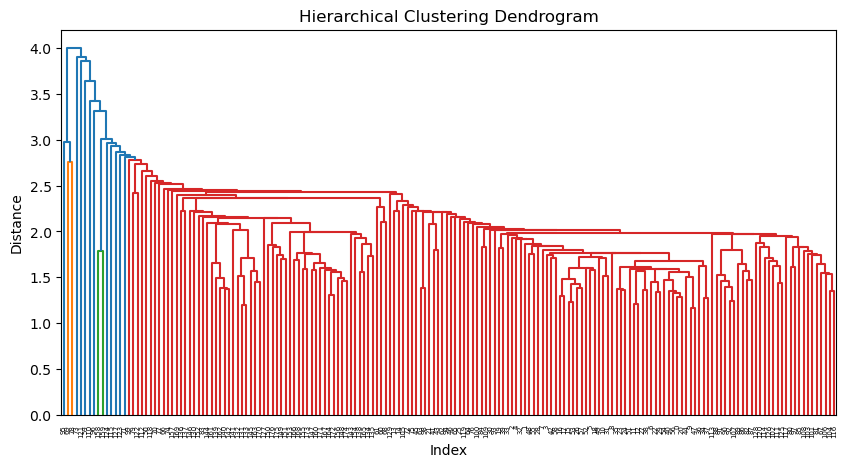

In [264]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(scaler_wine, method='single',metric='euclidean'))

### Implementing Complete Hierarichal Clustering on PCA Data

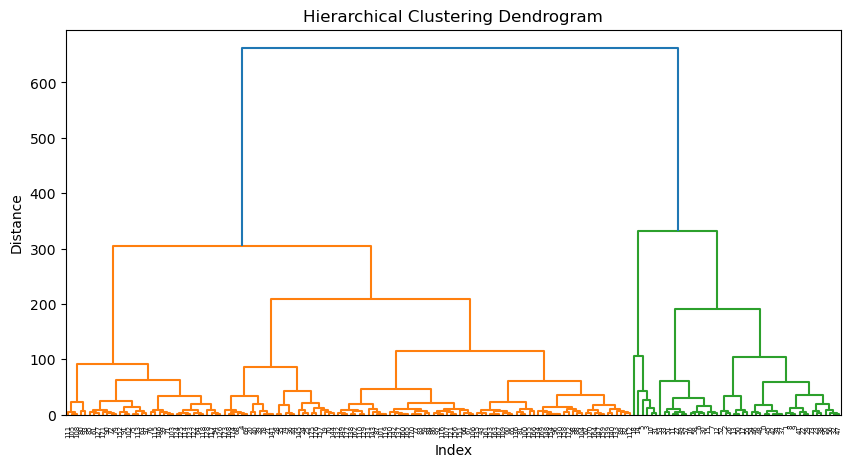

In [265]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(principalDf, method='complete',metric='euclidean'))

### Implementing Complete Hierarichal Clustering on scaled Data of all chemical measurements

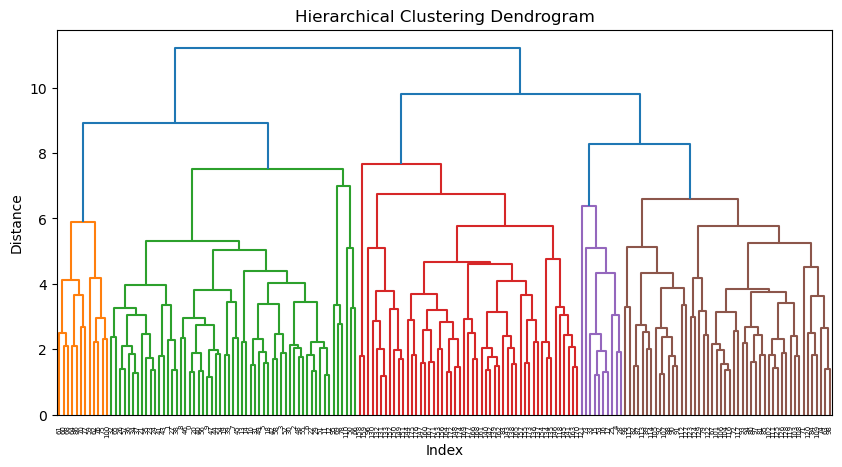

In [266]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(scaler_wine, method='complete',metric='euclidean'))

### Implementing average Hierarichal Clustering on PCA Data

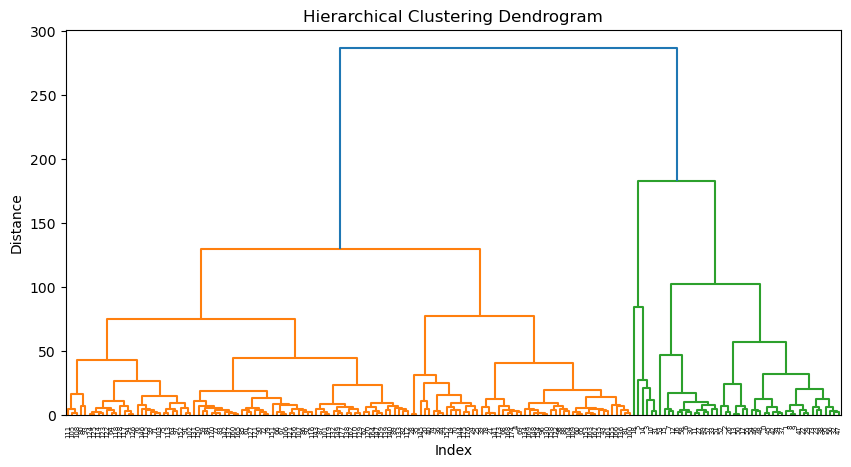

In [267]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(principalDf, method='average',metric='euclidean'))

### Implementing average Hierarichal Clustering on scaled Data of all chemical measurements

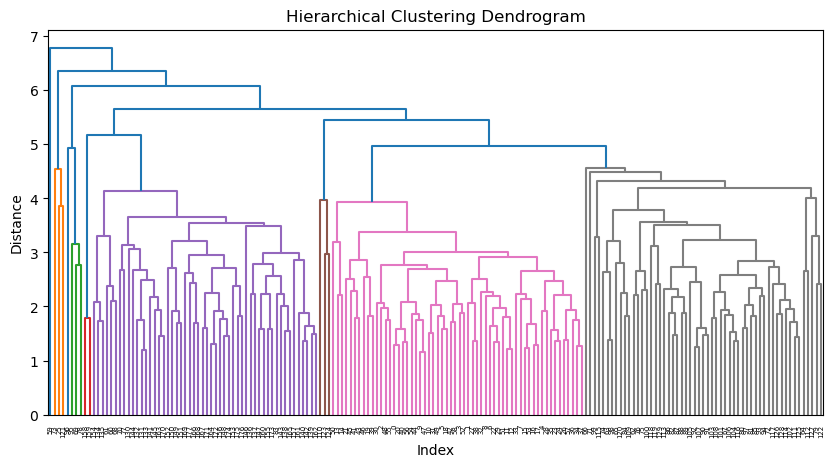

In [268]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(scaler_wine, method='average',metric='euclidean'))

### Implementing Centroid Hierarichal Clustering on PCA Data

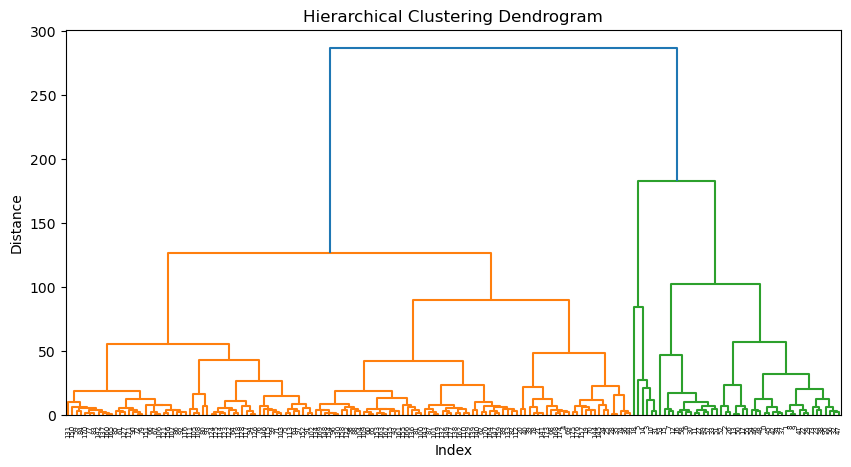

In [269]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(principalDf, method='centroid',metric='euclidean'))

### Implementing Centroid Hierarichal Clustering on scaled Data of all chemical measurements

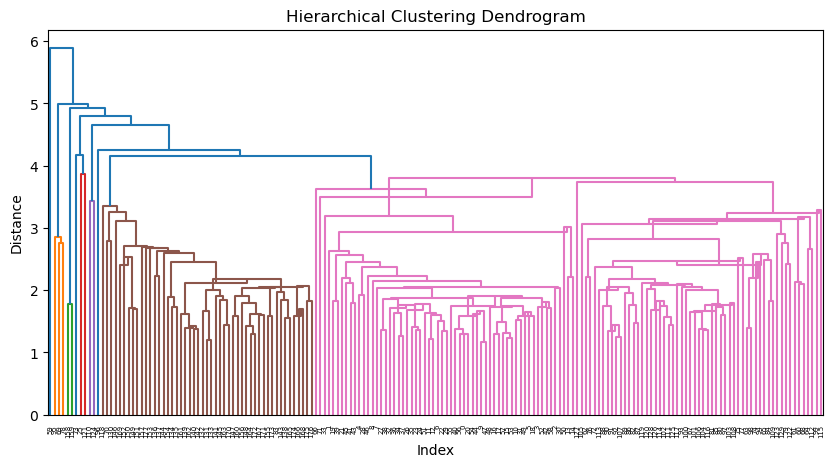

In [270]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(scaler_wine, method='centroid',metric='euclidean'))

### Implementing Wards Hierarichal Clustering on PCA Data

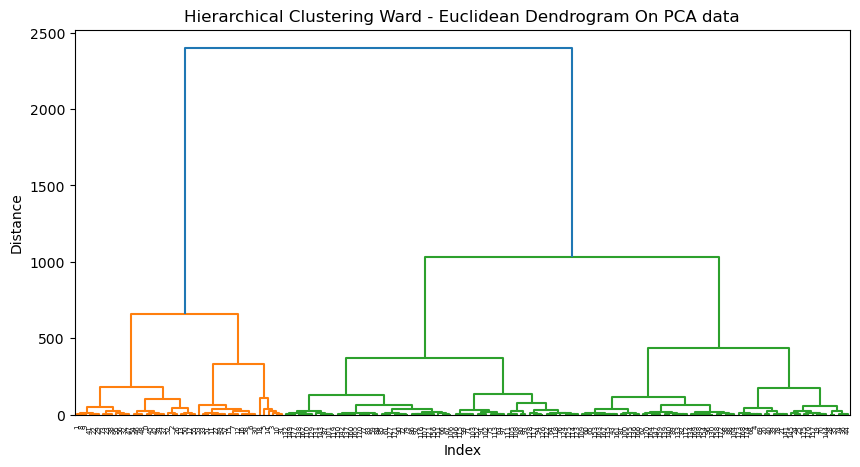

In [351]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Ward - Euclidean Dendrogram On PCA data');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(principalDf, method='ward',metric='euclidean'))

### Implementing Wards Hierarichal Clustering on scaled Data of all chemical measurements

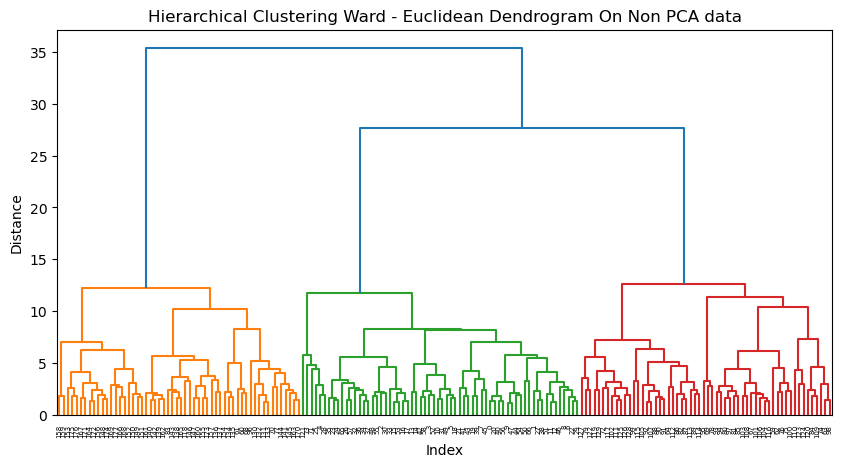

In [350]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Ward - Euclidean Dendrogram On Non PCA data');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(scaler_wine, method='ward',metric='euclidean'))

# Selecting Wards method for Hierarichal clustering for further analysis

### Applying agglomerative function & Find centroids on wards methods euclidean distance  on PCA data

In [333]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [334]:
pca_wine_for_ward=principalDf.copy()
pca_wine_for_ward.head()

pc 1        pc 2
0  325.637020 -436.868698
1  317.812078 -422.143492
2  355.267740 -472.707109
3  442.477439 -585.573346
4  227.486905 -313.004257

In [335]:
h_complete = AgglomerativeClustering(n_clusters=3,linkage='ward',affinity = "euclidean").fit(pca_wine_for_ward)
h_complete.fit_predict(pca_wine_for_ward)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2], dtype=int64)

In [336]:
cluster_labels=pd.Series(h_complete.labels_)
# creating a  new column and assigning it to new column
pca_wine_for_ward['clust']=cluster_labels
pca_wine_for_ward['Class'] = y
print(pca_wine_for_ward)

           pc 1        pc 2  clust  Class
0    325.637020 -436.868698      0      1
1    317.812078 -422.143492      0      1
2    355.267740 -472.707109      0      1
3    442.477439 -585.573346      0      1
4    227.486905 -313.004257      1      1
..          ...         ...    ...    ...
173  222.628343 -310.732186      1      3
174  226.502009 -315.739704      1      3
175  253.624048 -353.684331      1      3
176  255.586884 -354.636593      1      3
177  170.731645 -246.115609      2      3

[178 rows x 4 columns]


## creating File for PCA ward clustering

In [337]:
pca_wine_for_ward.to_csv("wine_pca_ward_cluster_labeled.csv",encoding="utf-8")

In [338]:
print('Count in each cluster: \n', pca_wine_for_ward['clust'].value_counts())

Count in each cluster: 
 2    68
1    62
0    48
Name: clust, dtype: int64


In [339]:
# Read the already clustered data into a DataFrame
df = pca_wine_for_ward

# Assuming the 'cluster_label' column contains the cluster assignments
cluster_labels = df['clust'].unique()

# Calculate cluster centroids
centroid_list = []
for label in cluster_labels:
    cluster_points = df[df['clust'] == label]
    centroid = cluster_points.mean()
    centroid_list.append(centroid)

# Create a DataFrame to store the cluster centroids
centroid_df = pd.DataFrame(centroid_list)

# Print the cluster centroids DataFrame
print(centroid_df)


         pc 1        pc 2  clust     Class
0  357.665409 -476.223868    0.0  1.041667
1  220.757243 -304.435179    1.0  2.274194
2  142.923048 -202.931239    2.0  2.264706


### Applying agglomerative function & Find centroids on wards methods euclidean distance on scaled Data of all chemical measurements

In [340]:
h_complete = AgglomerativeClustering(n_clusters=3,linkage='ward',affinity = "euclidean").fit(scaler_wine)
h_complete.fit_predict(scaler_wine)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [342]:
WineNonPCAWithWardClusterMembership=input.copy()
cluster_labels=pd.Series(h_complete.labels_)
# creating a  new column and assigning it to new column
WineNonPCAWithWardClusterMembership['clust']=cluster_labels
print(WineNonPCAWithWardClusterMembership)

     Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1

## creating File for non PCA ward clustering

In [345]:
WineNonPCAWithWardClusterMembership.to_csv("wine_non_pca_ward_cluster_labeled.csv",encoding="utf-8")

In [346]:
print('Count in each cluster: \n', WineNonPCAWithWardClusterMembership['clust'].value_counts())

Count in each cluster: 
 2    64
0    58
1    56
Name: clust, dtype: int64


In [349]:
# Read the already clustered data into a DataFrame
df = WineNonPCAWithWardClusterMembership

# Assuming the 'cluster_label' column contains the cluster assignments
cluster_labels = df['clust'].unique()

# Calculate cluster centroids
centroid_list = []
for label in cluster_labels:
    cluster_points = df[df['clust'] == label]
    centroid = cluster_points.mean()
    centroid_list.append(centroid)

# Create a DataFrame to store the cluster centroids
centroid_df = pd.DataFrame(centroid_list)

# Print the cluster centroids DataFrame
centroid_df.T

0           1           2
Class                    1.078125    2.000000    2.857143
Alcohol                 13.669219   12.203966   13.061607
Malic_Acid               1.970000    1.938966    3.166607
Ash                      2.463125    2.215172    2.412857
Alcalinity_of_ash       17.528125   20.208621   21.003571
Magnesium              106.156250   92.551724   99.857143
Total_phenols            2.850000    2.262931    1.694286
Flavanoids               3.009688    2.088103    0.847857
Nonflavanoid_phenols     0.291094    0.355345    0.449464
Proanthocyanins          1.908125    1.686552    1.129286
Color_intensity          5.450000    2.895345    6.850179
Hue                      1.071406    1.060000    0.721000
OD                       3.158438    2.862241    1.727321
Proline               1076.046875  501.431034  624.946429
clust                    2.000000    0.000000    1.000000

## Comparing Dendogram and silhouette_score on Non PCA Data

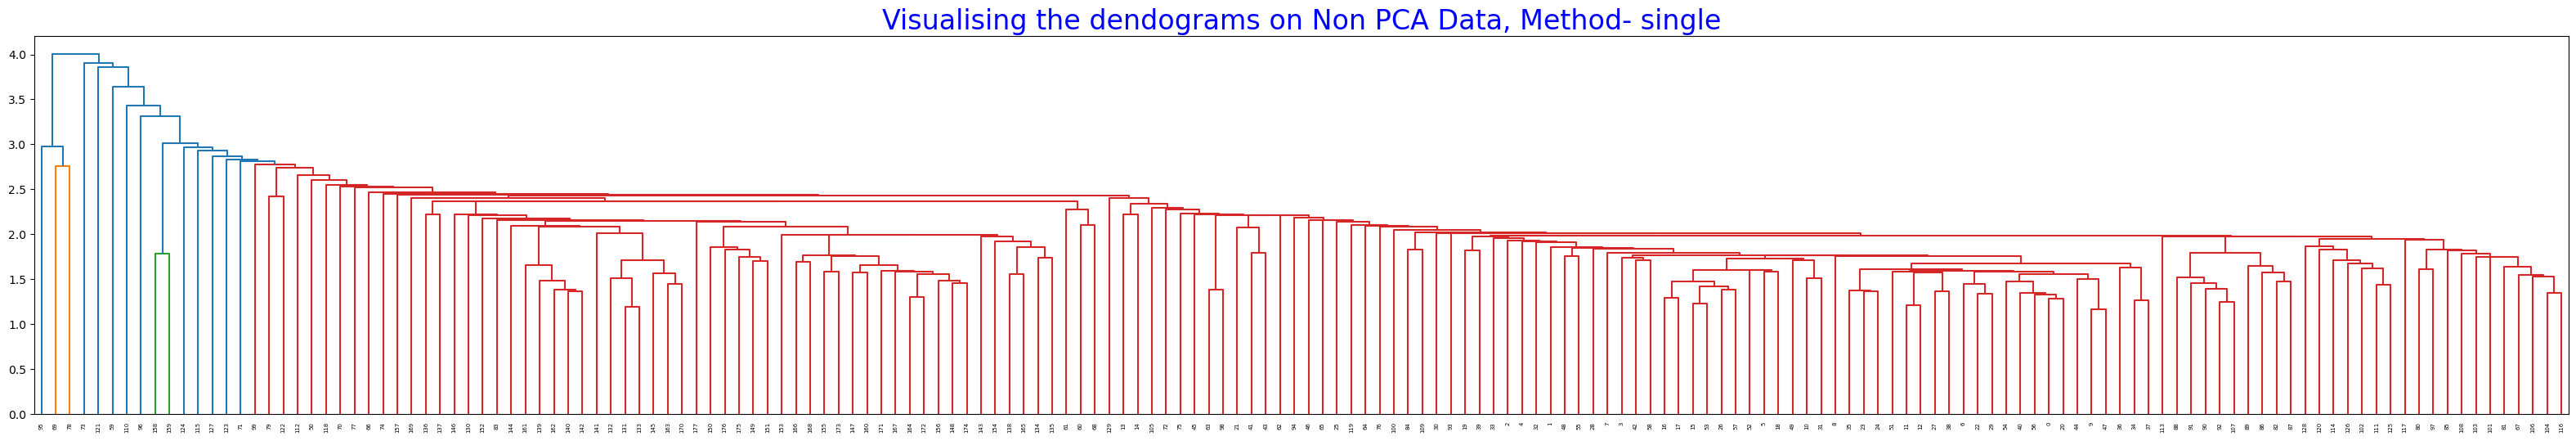

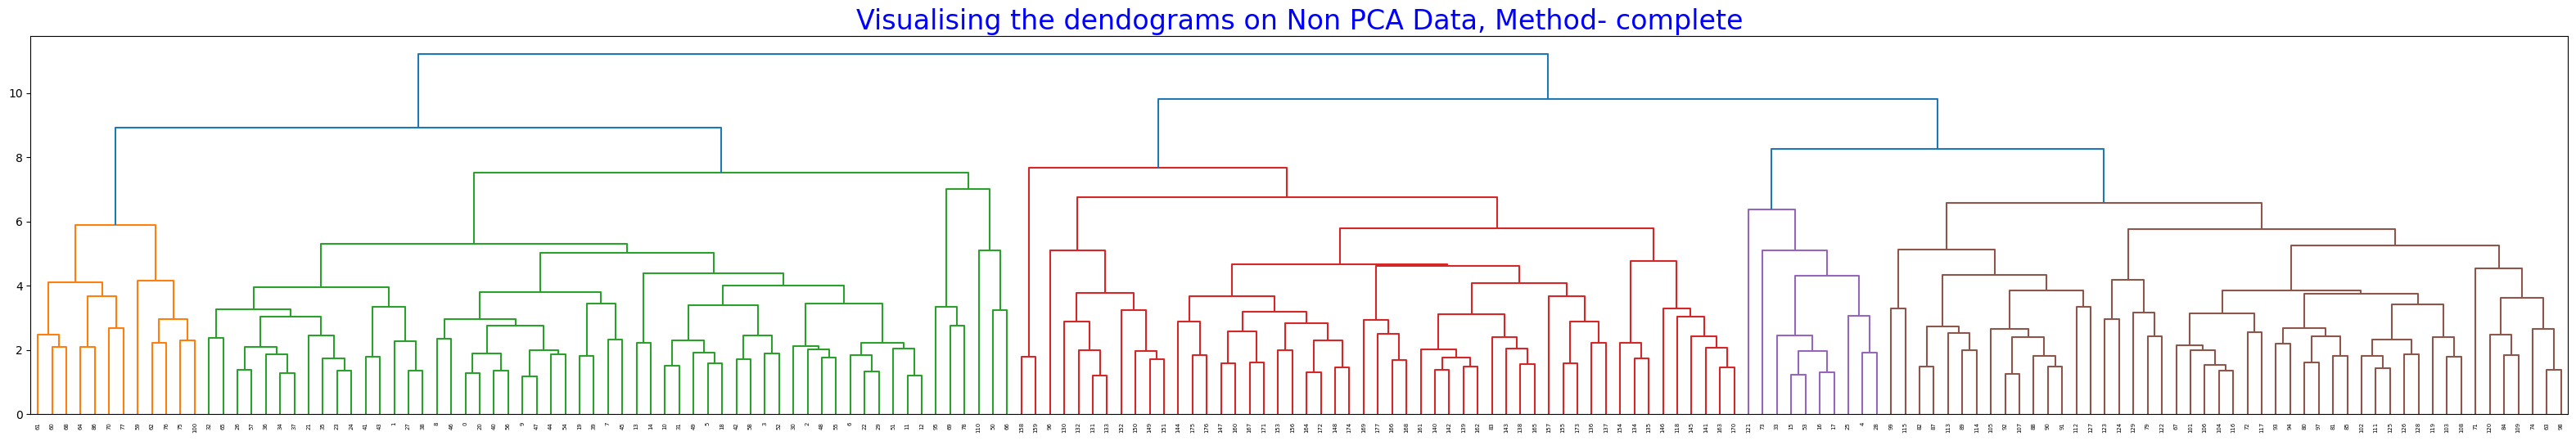

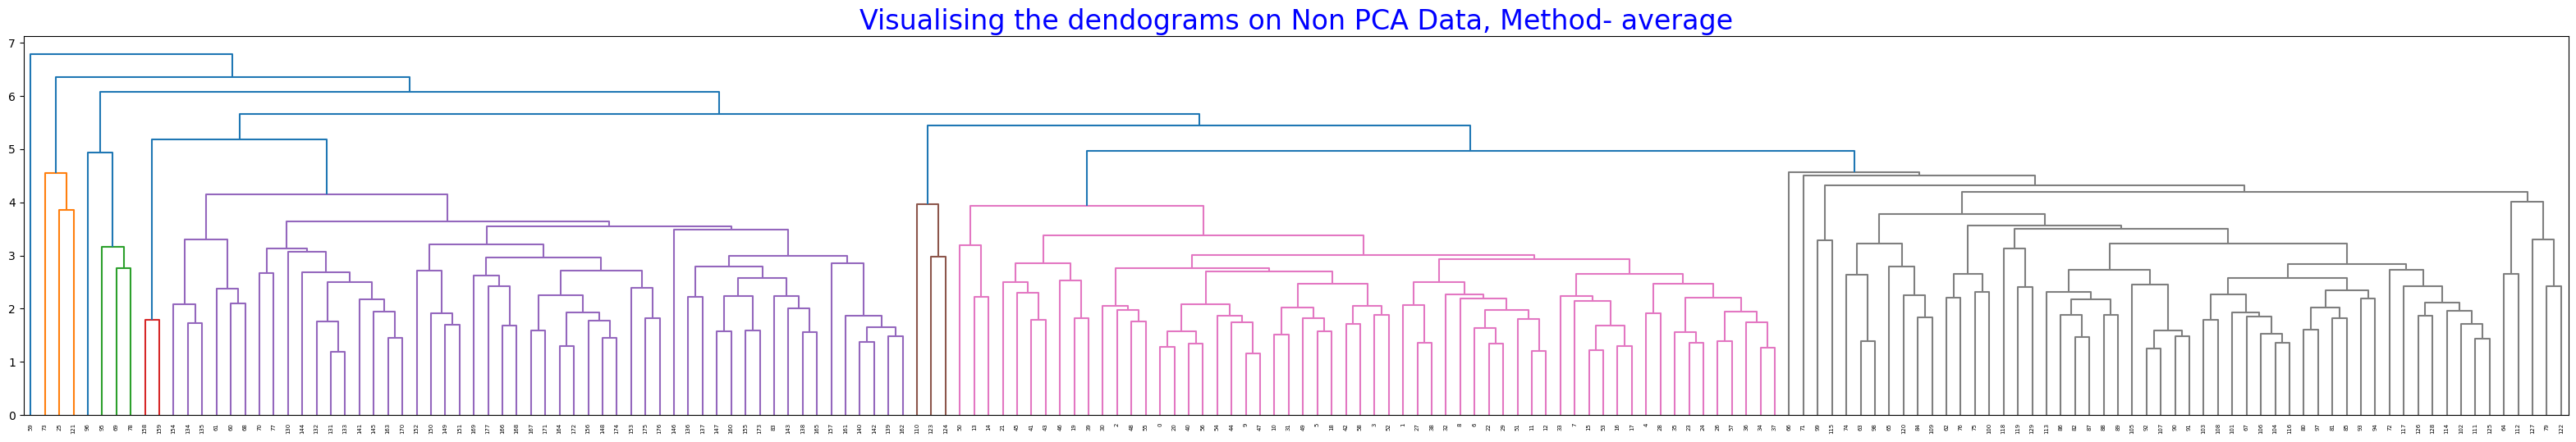

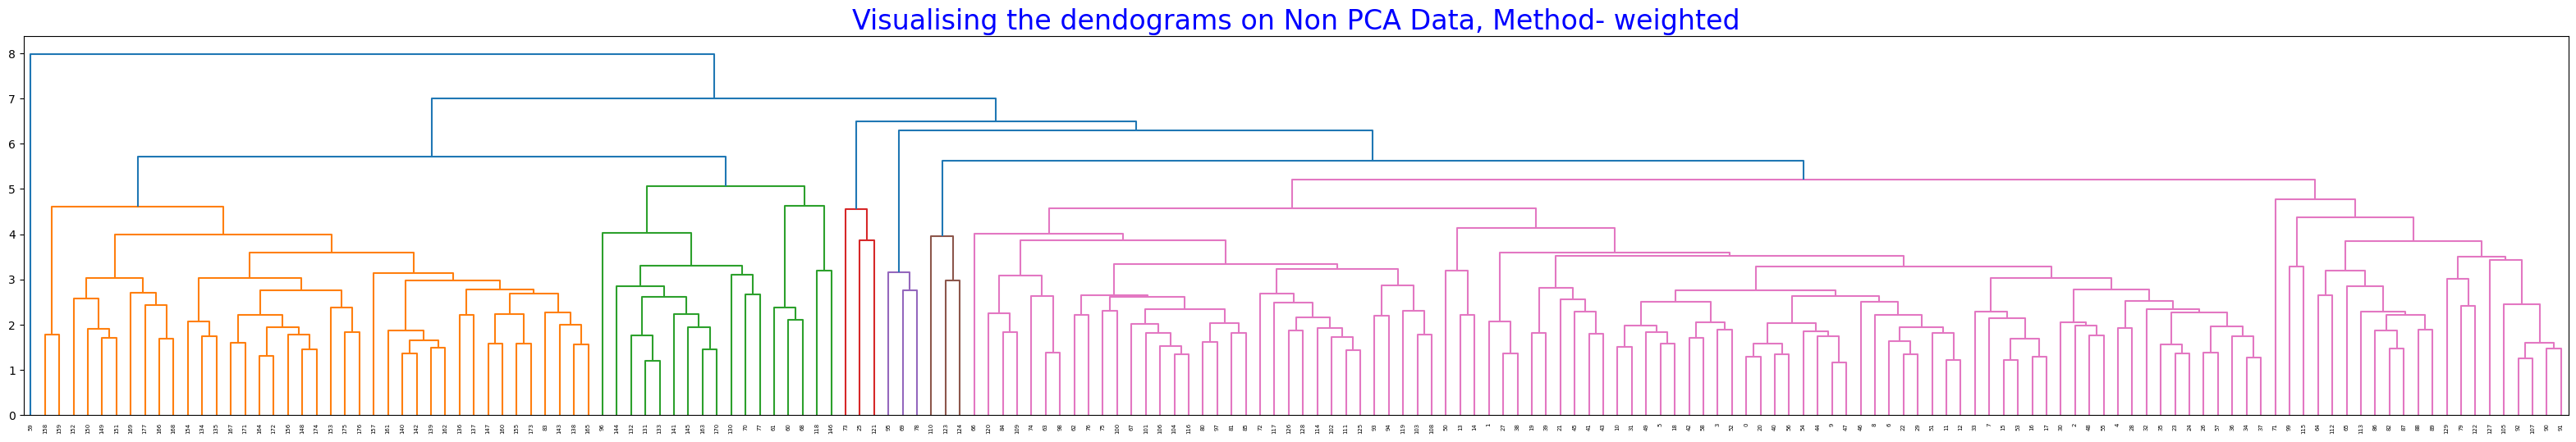

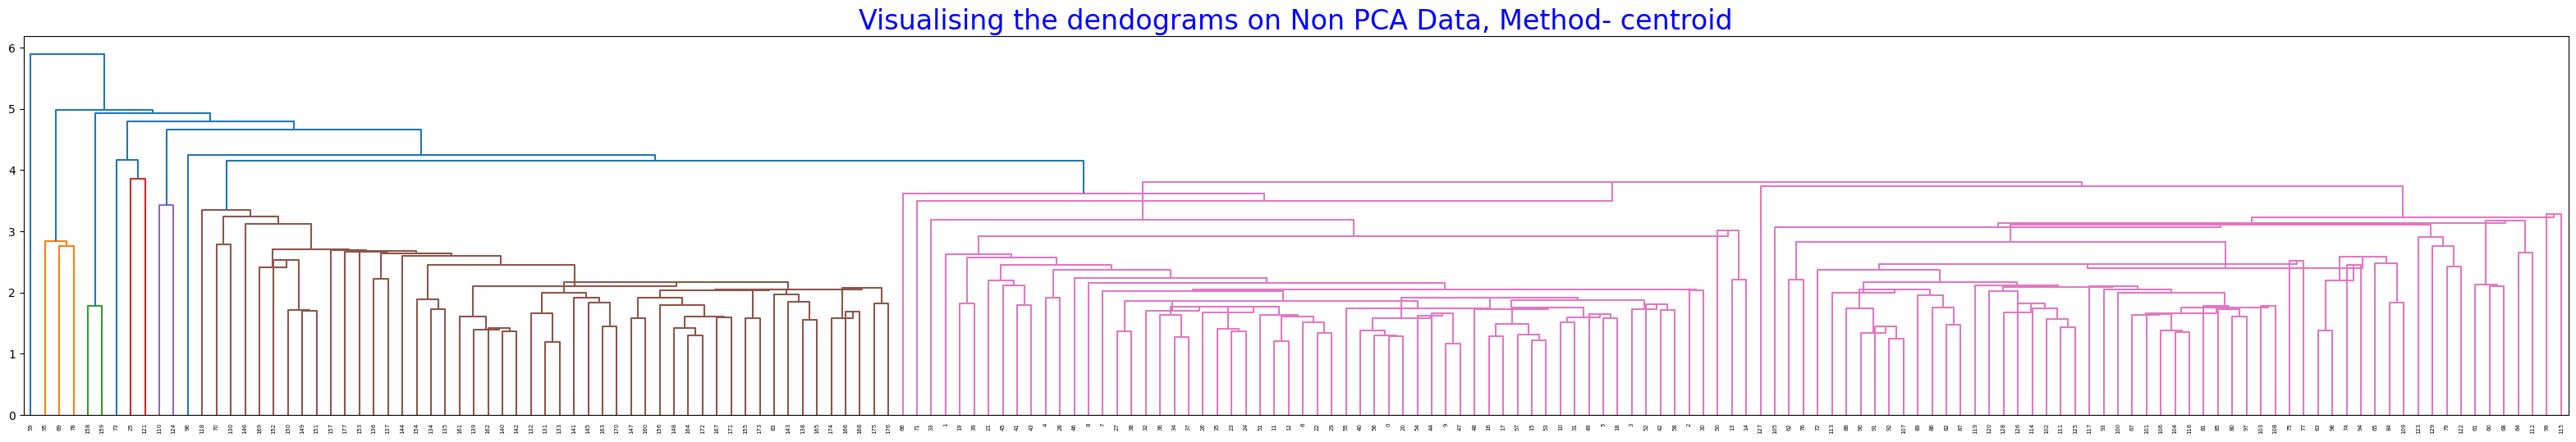

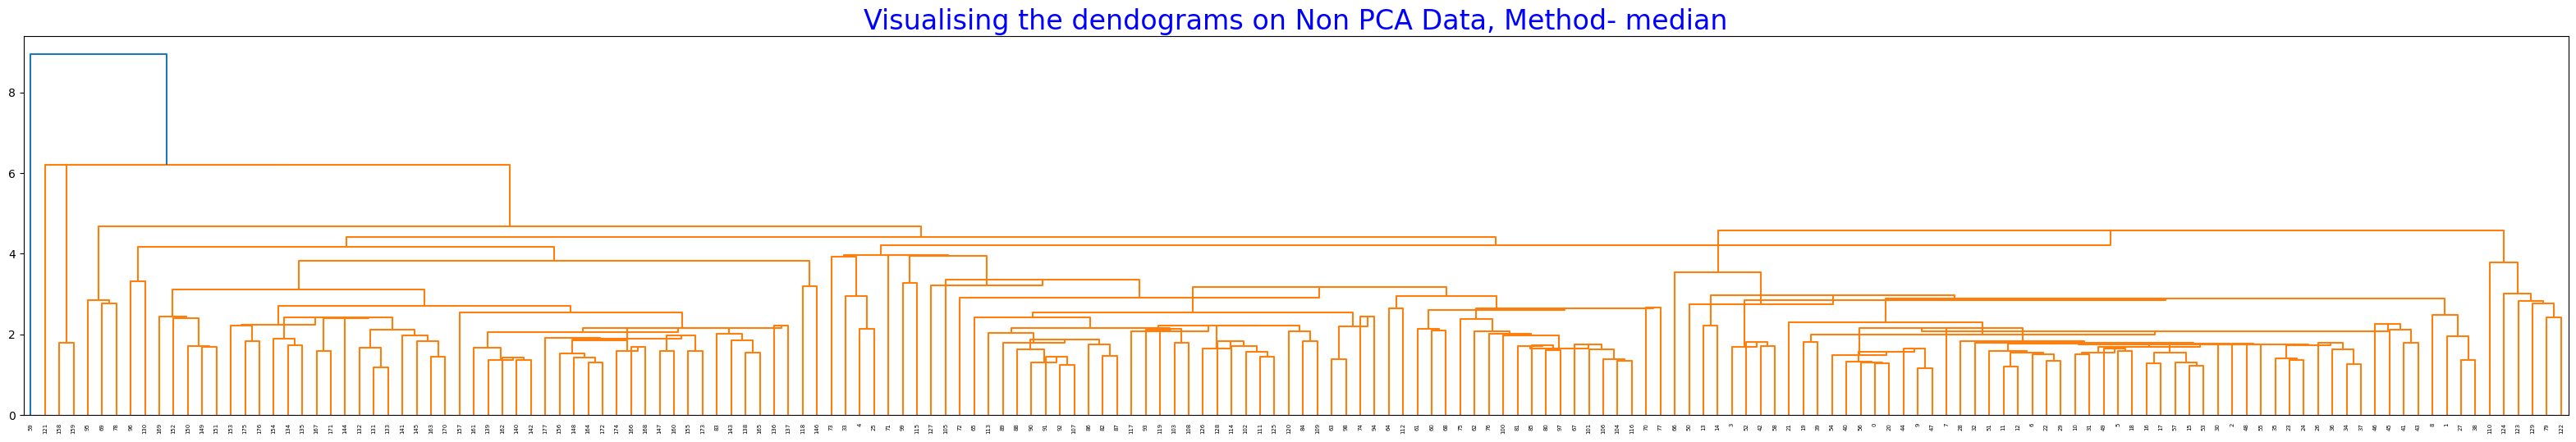

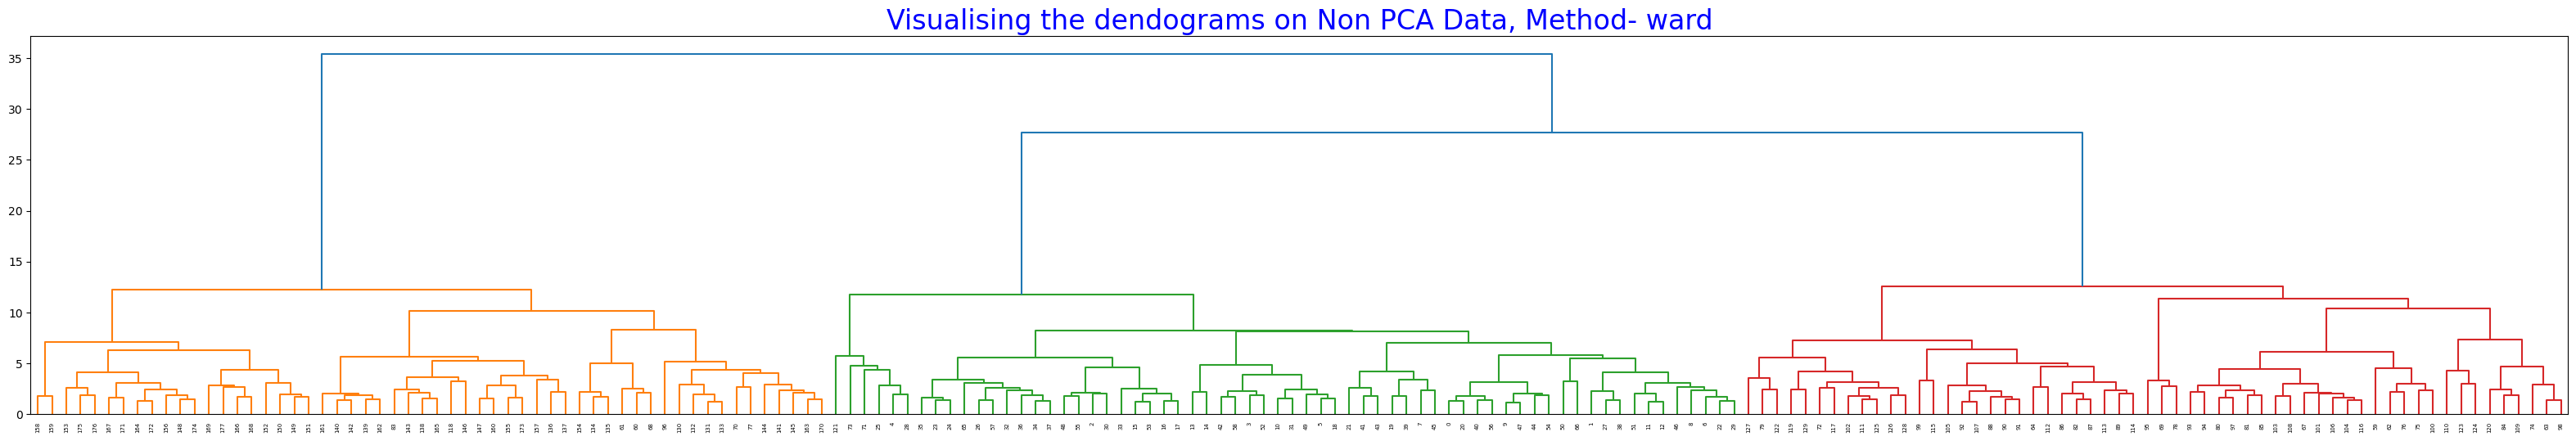

In [355]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(40, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the dendograms on Non PCA Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(scaler_wine, method = methods,optimal_ordering=False))

In [356]:
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
n_clusters = [2,3,4,5]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(scaler_wine)
        silhouette_score1 = sil(scaler_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score for Non PCA data with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score for Non PCA data with linkage- ward : 0.2670131771272231
For n_clusters = 2 The average silhouette_score for Non PCA data with linkage- complete : 0.16186821075824512
For n_clusters = 2 The average silhouette_score for Non PCA data with linkage- average : 0.2591060736265412
For n_clusters = 2 The average silhouette_score for Non PCA data with linkage- single : 0.2224506072765093

For n_clusters = 3 The average silhouette_score for Non PCA data with linkage- ward : 0.2774439826952265
For n_clusters = 3 The average silhouette_score for Non PCA data with linkage- complete : 0.20378689690677748
For n_clusters = 3 The average silhouette_score for Non PCA data with linkage- average : 0.15752526243774145
For n_clusters = 3 The average silhouette_score for Non PCA data with linkage- single : 0.18273797160972796

For n_clusters = 4 The average silhouette_score for Non PCA data with linkage- ward : 0.225836659334758
For n_clusters = 4 The average s

## Comparing Dendogram and silhouette_score on PCA Data

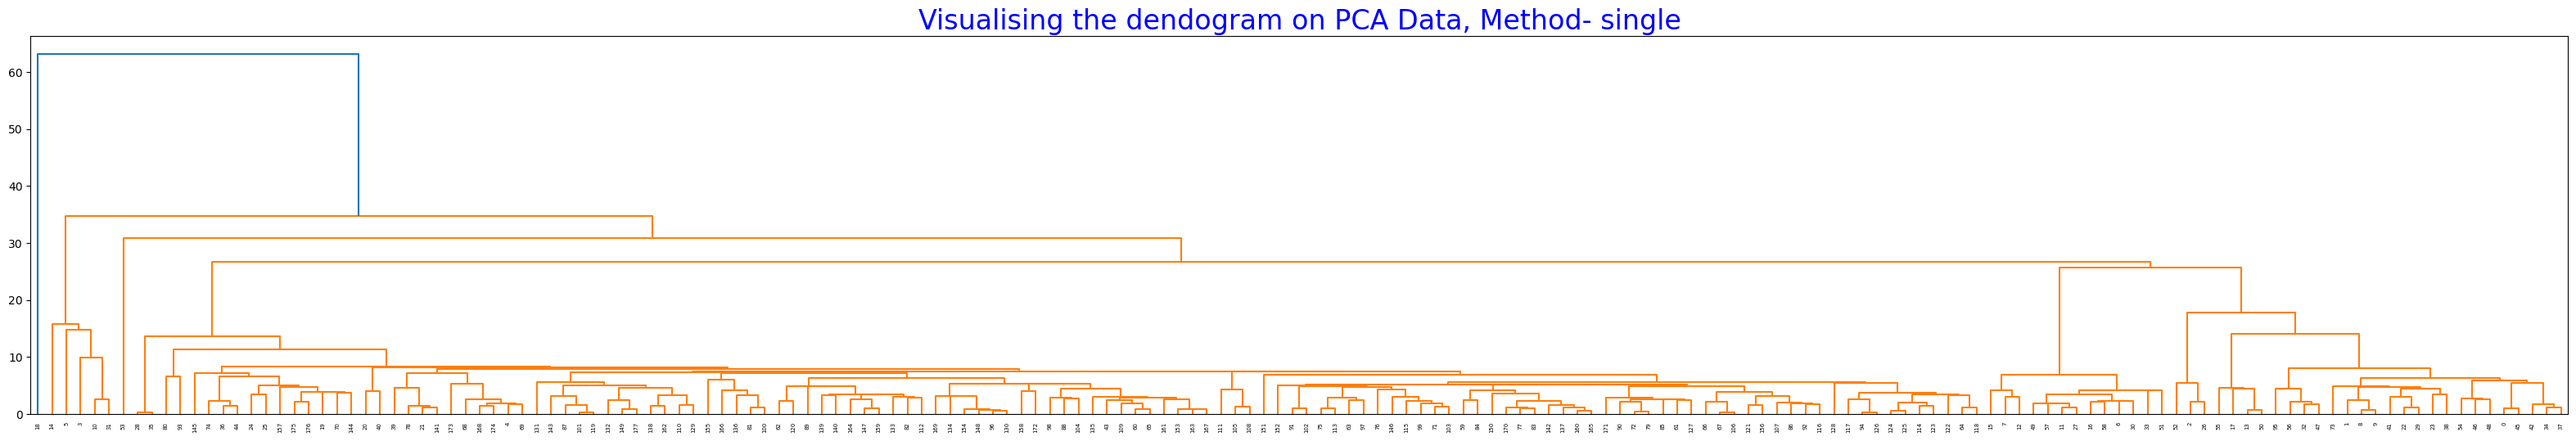

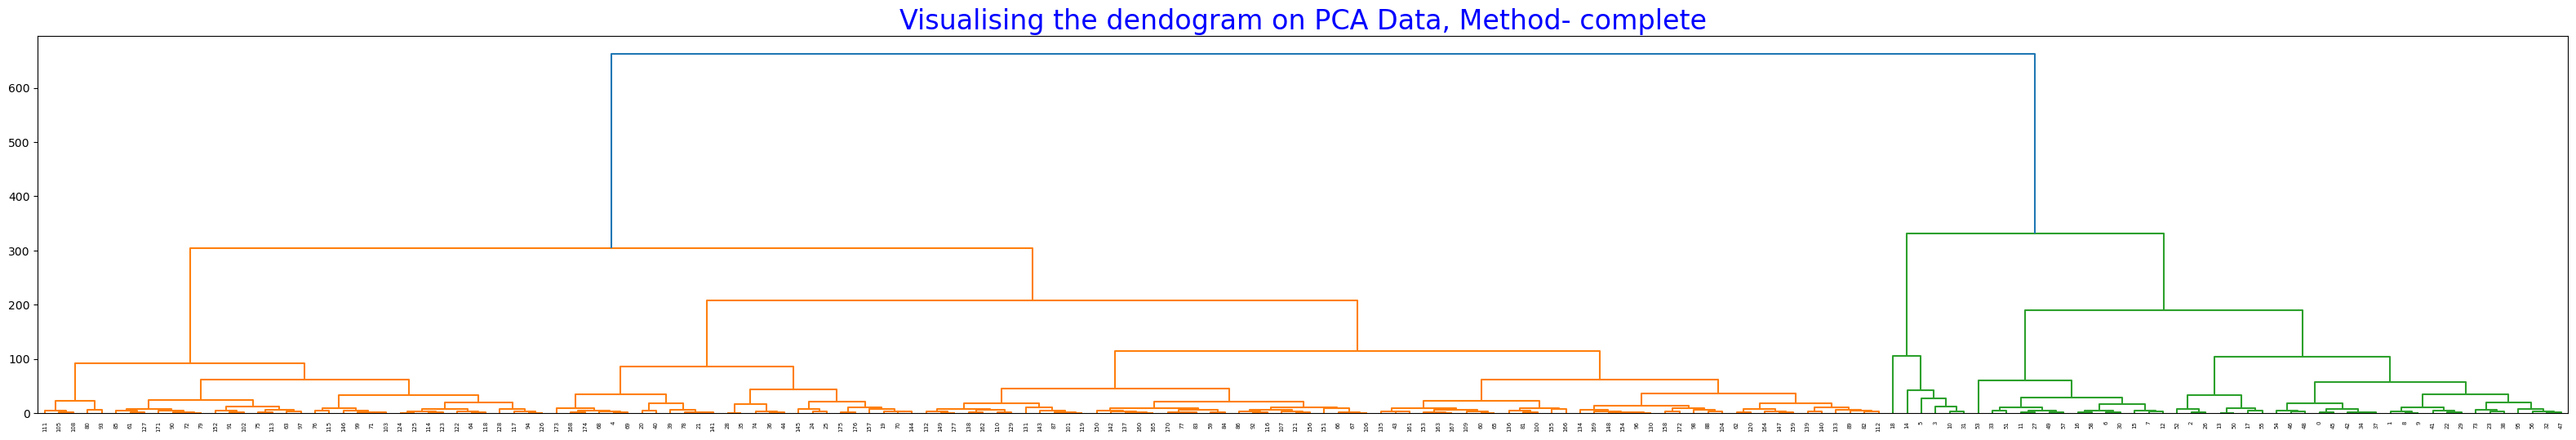

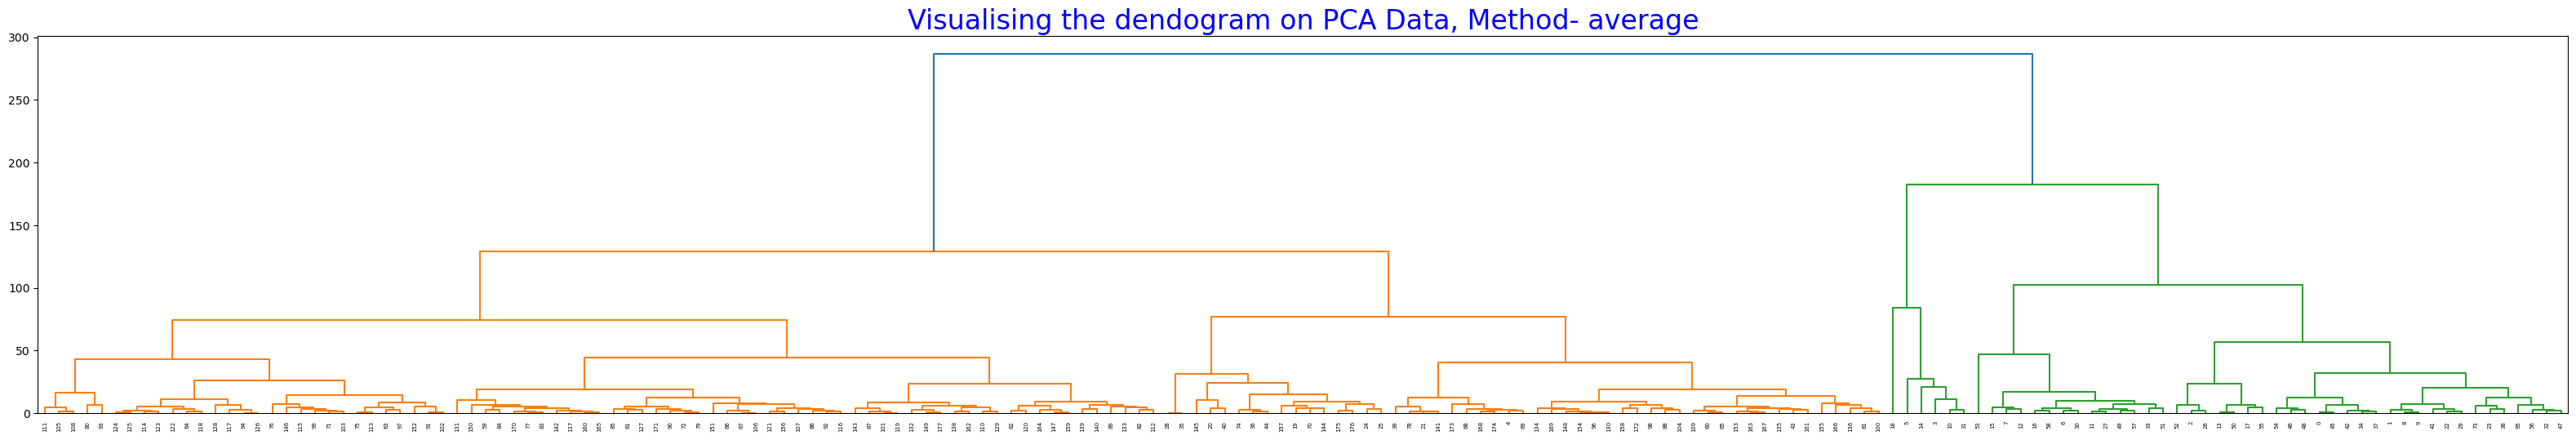

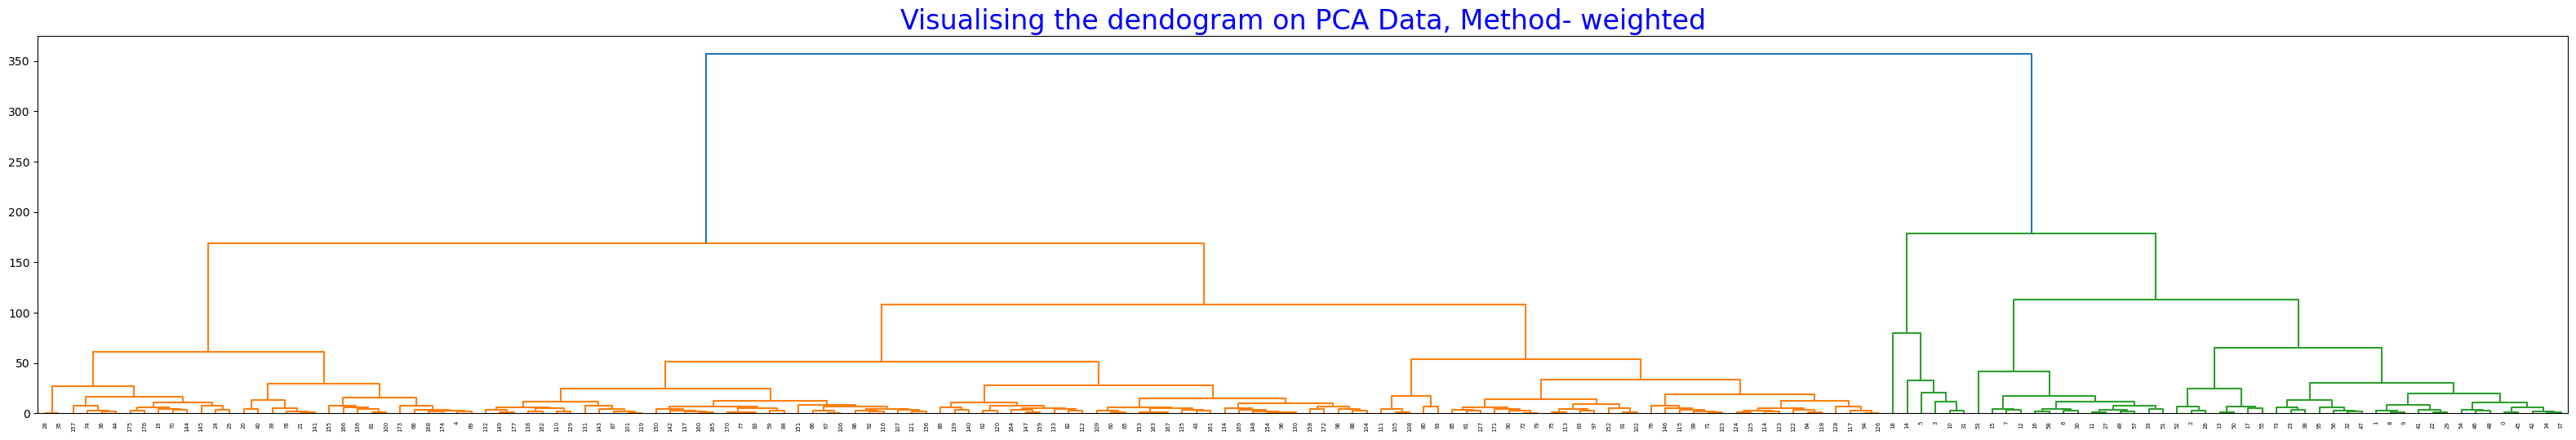

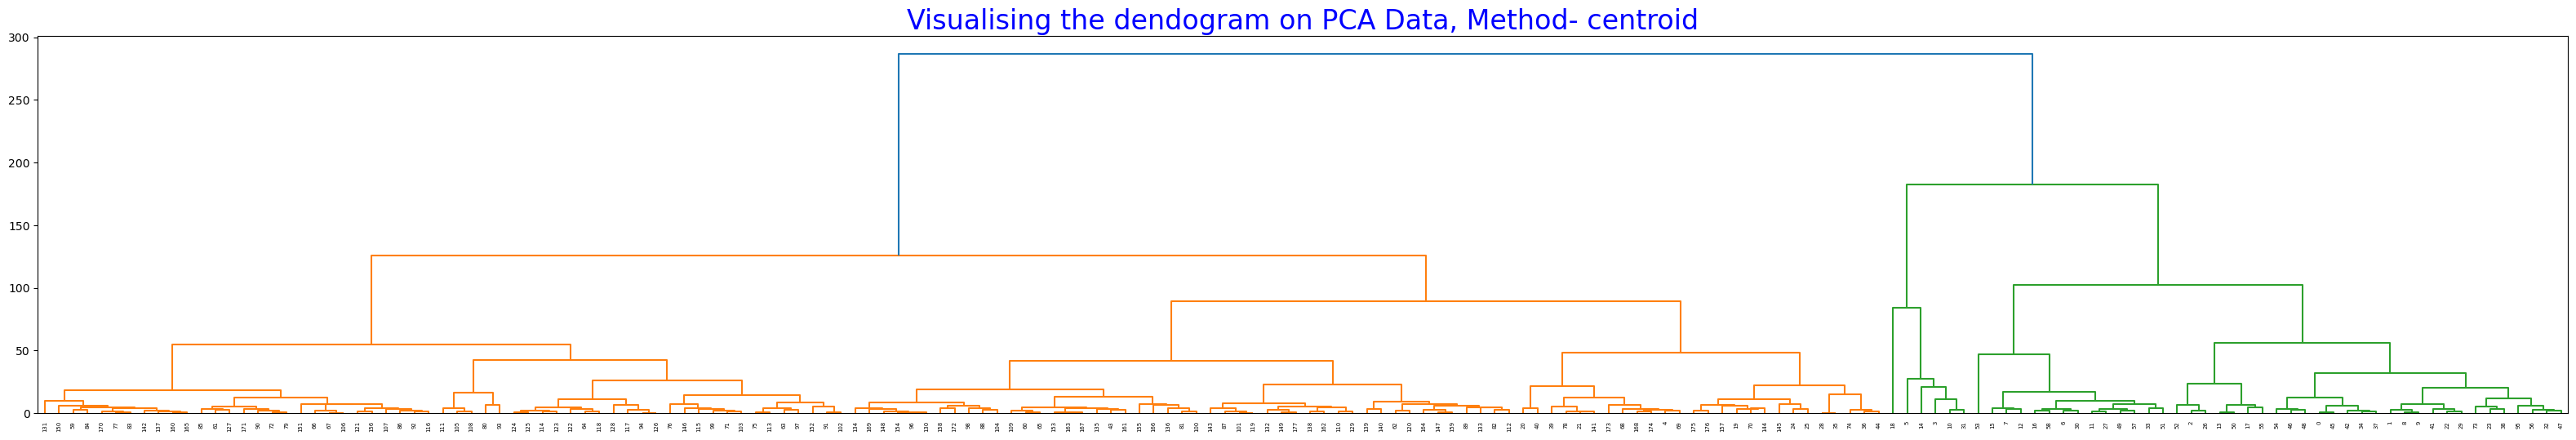

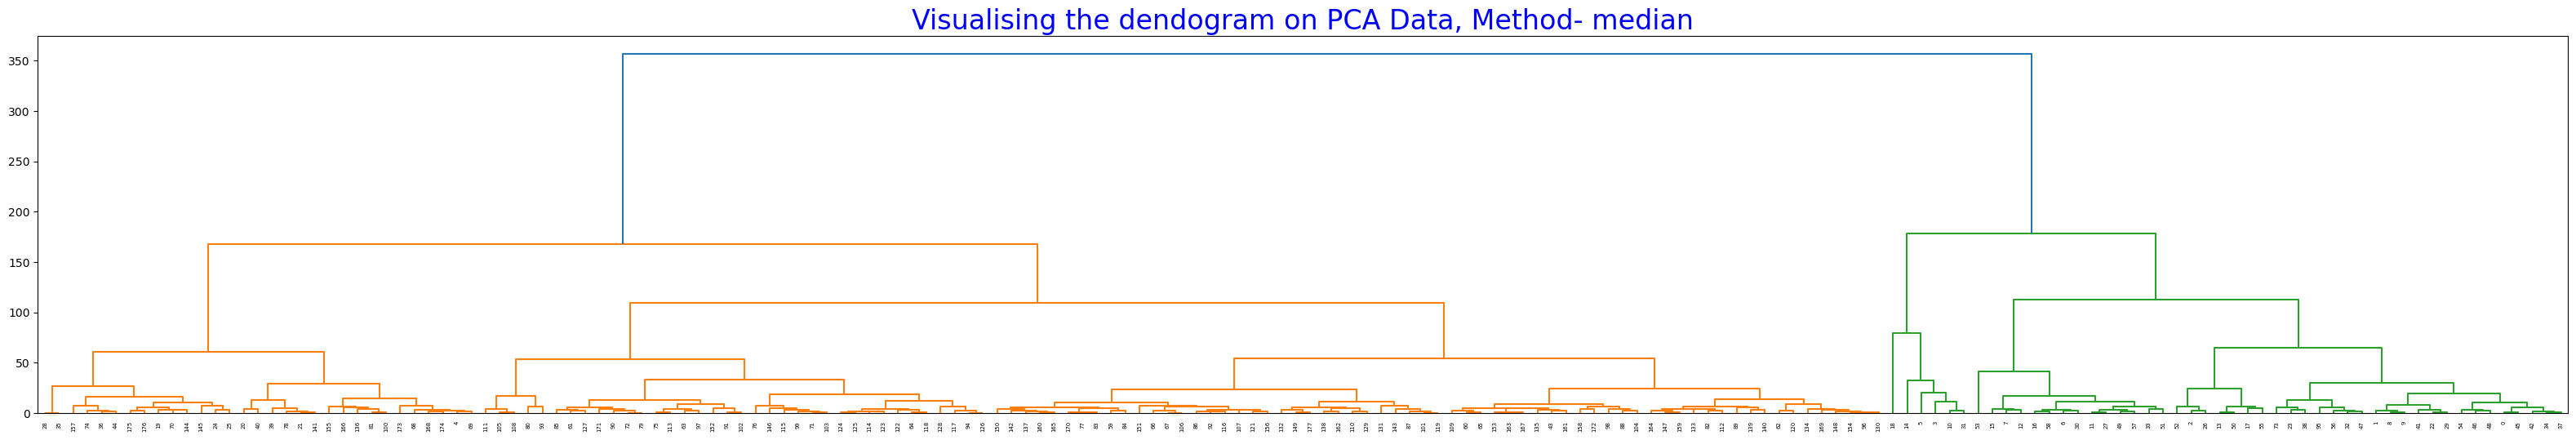

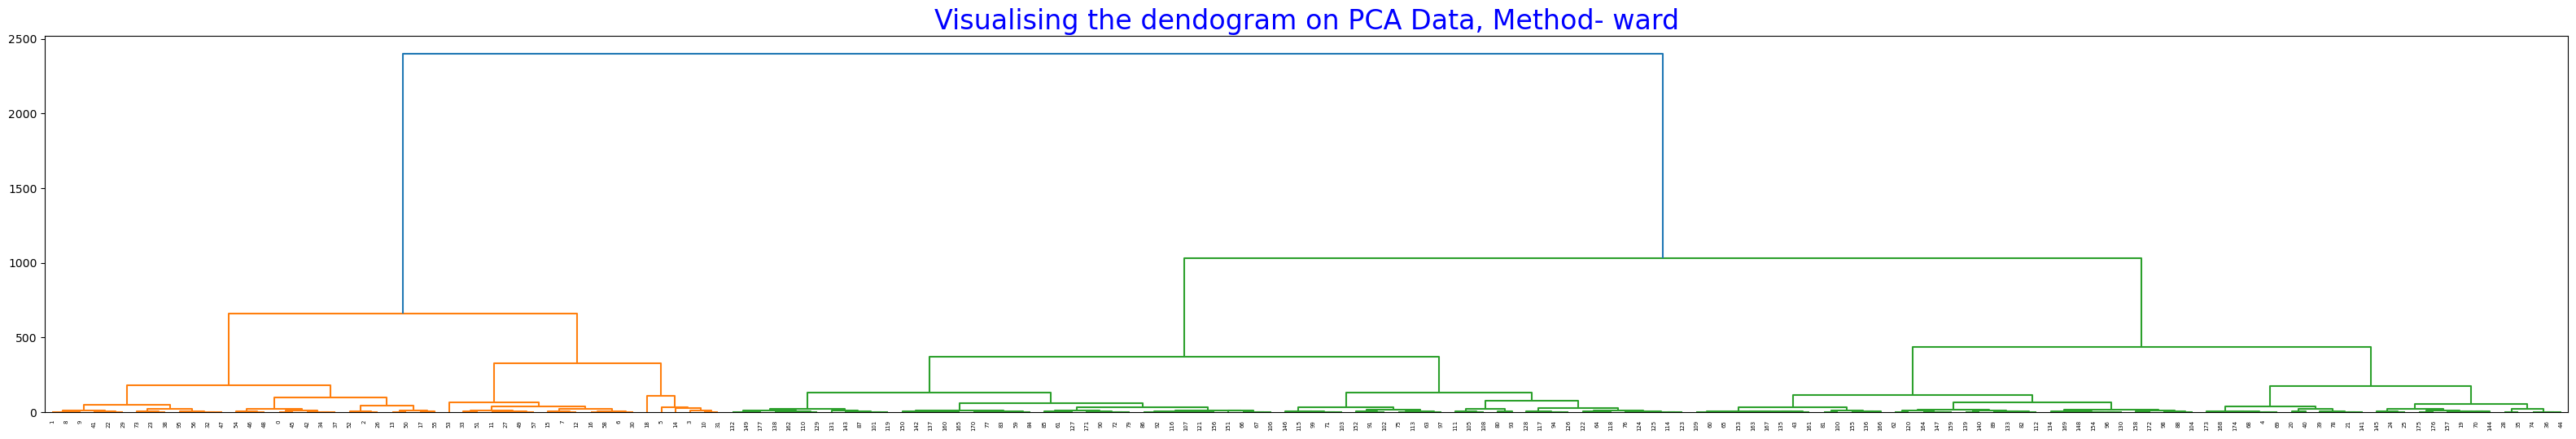

In [357]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(40, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the dendogram on PCA Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(principalDf, method = methods,optimal_ordering=False))

In [358]:
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
n_clusters = [2,3,4,5]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(principalDf)
        silhouette_score1 = sil(principalDf, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score for PCA data with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score for PCA data with linkage- ward : 0.6585655285910943
For n_clusters = 2 The average silhouette_score for PCA data with linkage- complete : 0.6585655285910943
For n_clusters = 2 The average silhouette_score for PCA data with linkage- average : 0.6585655285910943
For n_clusters = 2 The average silhouette_score for PCA data with linkage- single : 0.537251050095769

For n_clusters = 3 The average silhouette_score for PCA data with linkage- ward : 0.5797138401032538
For n_clusters = 3 The average silhouette_score for PCA data with linkage- complete : 0.6106036133871058
For n_clusters = 3 The average silhouette_score for PCA data with linkage- average : 0.6106036133871058
For n_clusters = 3 The average silhouette_score for PCA data with linkage- single : 0.48607804470372534

For n_clusters = 4 The average silhouette_score for PCA data with linkage- ward : 0.5731662973923852
For n_clusters = 4 The average silhouette_score for PCA data with linka

## Pairplot for EDA

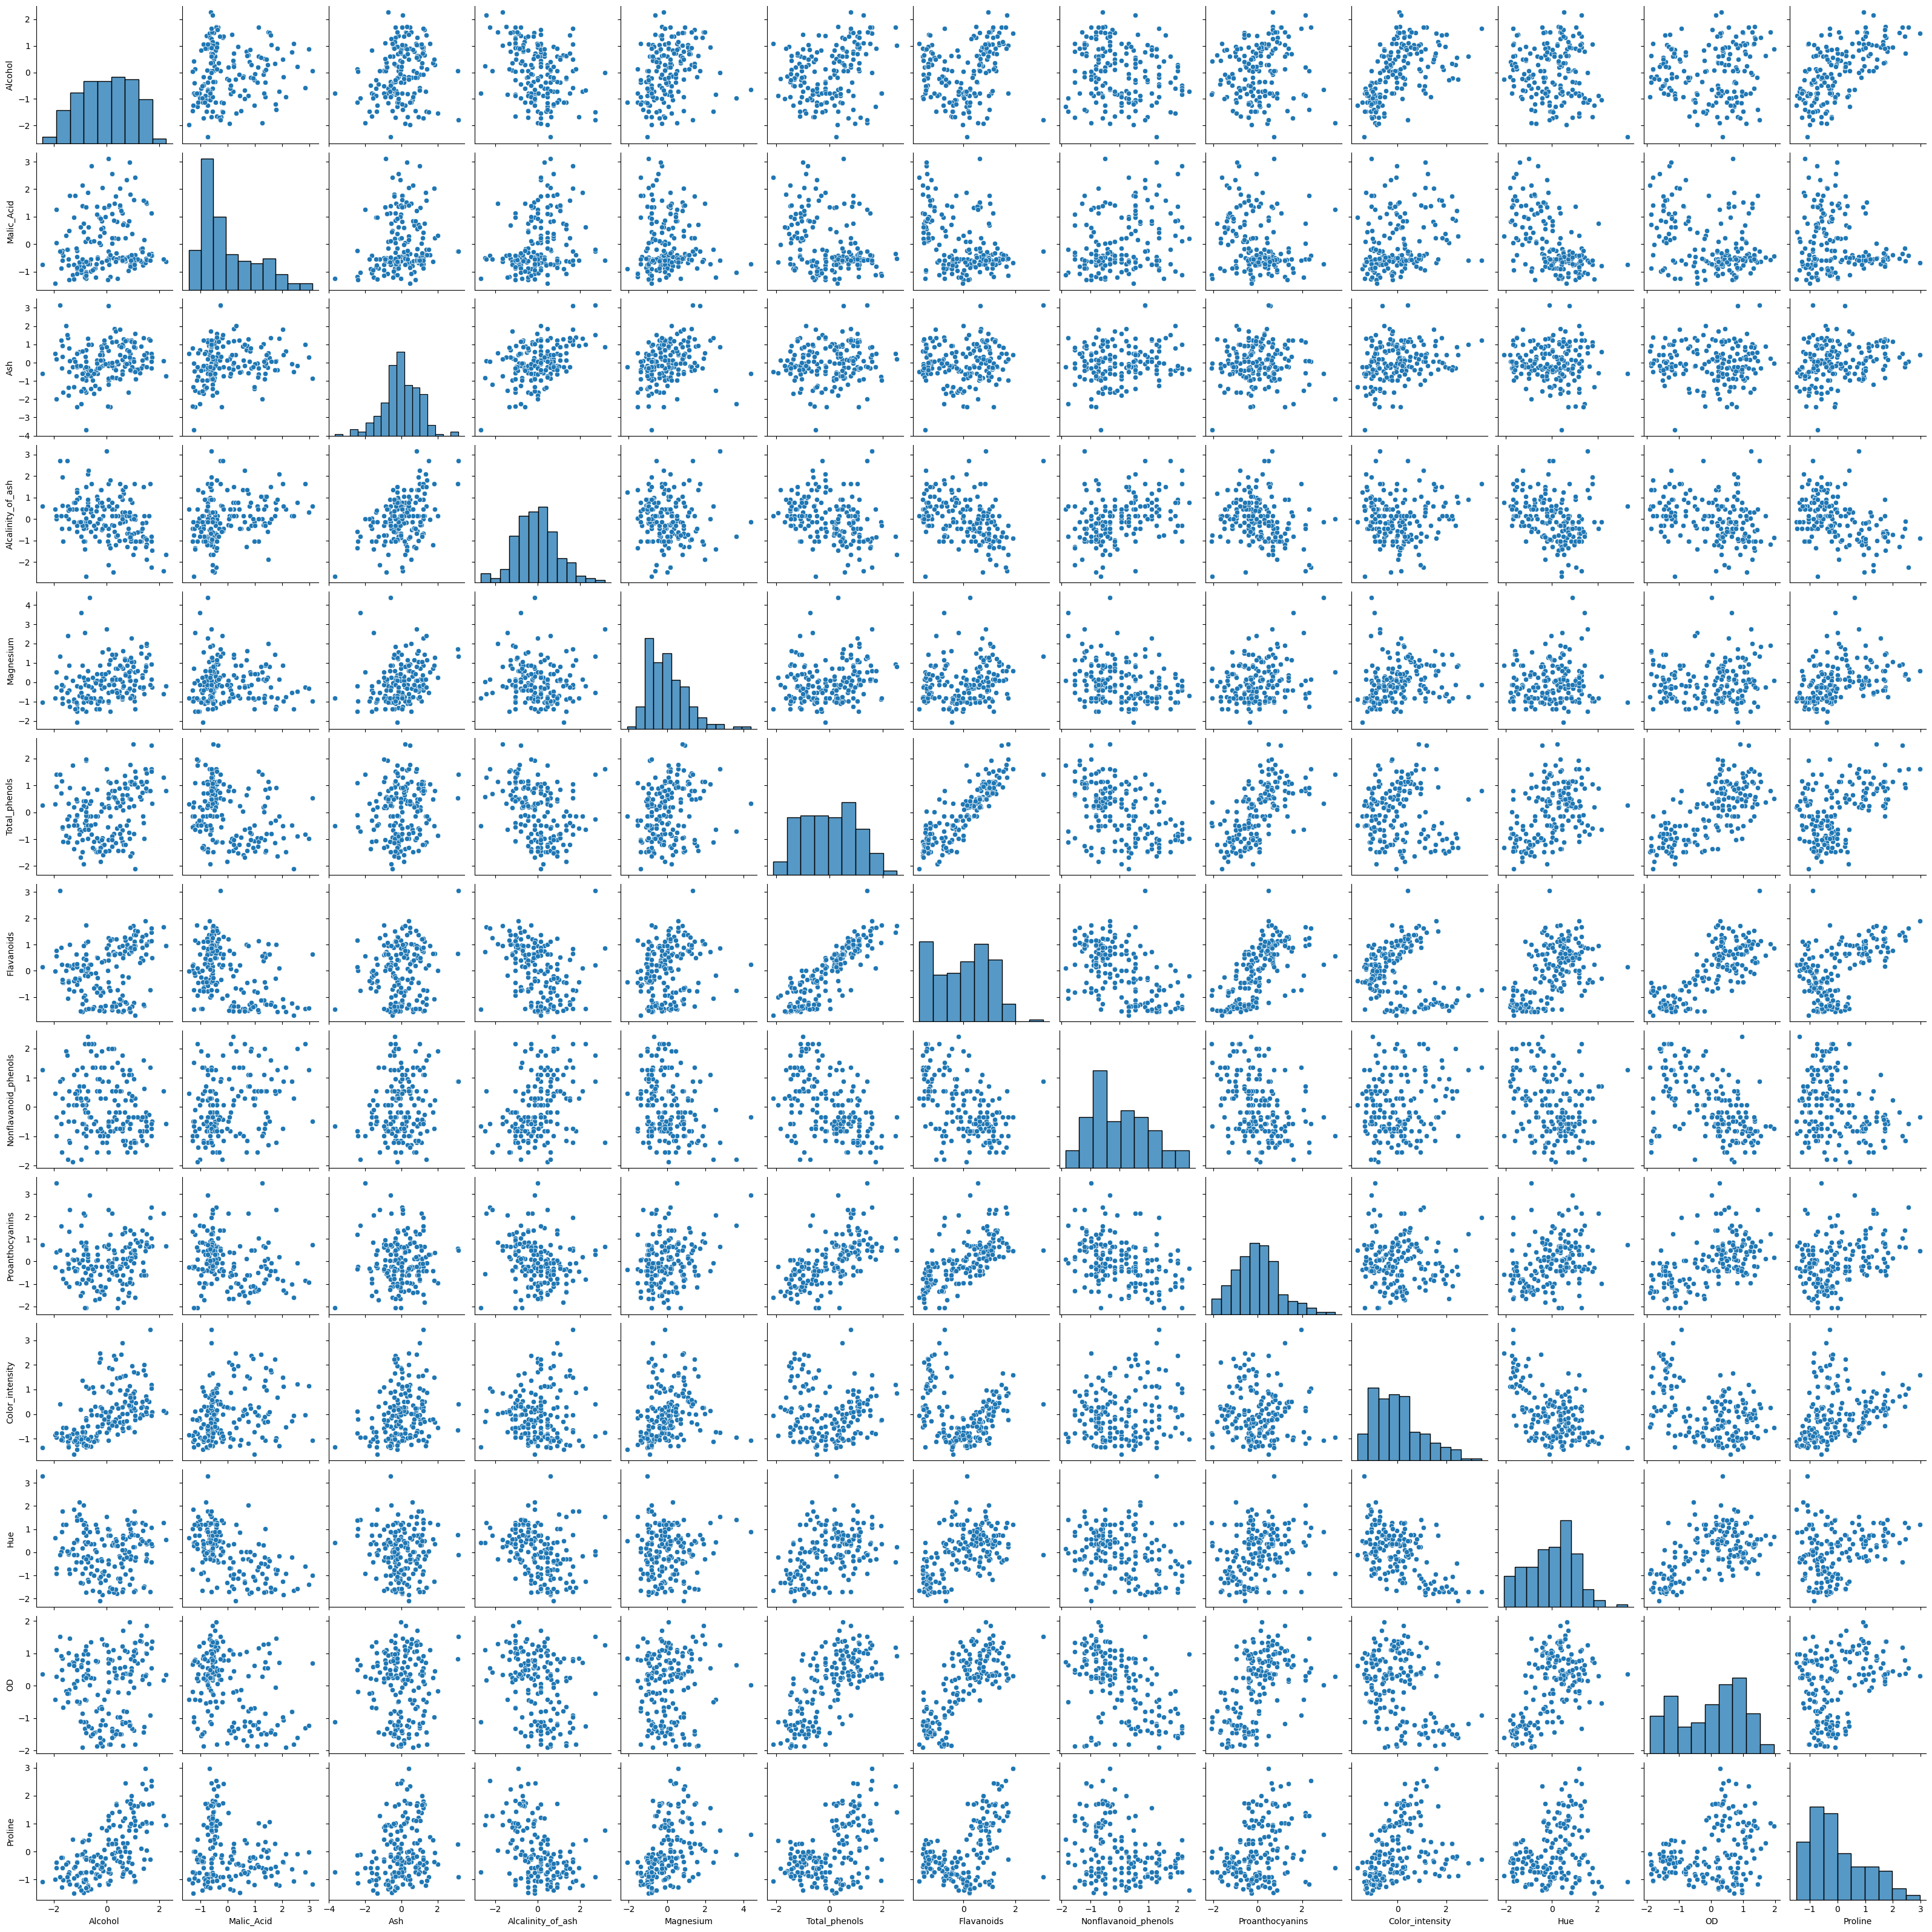

In [326]:
sns.pairplot(scaler_wine)

##  Check correlation between independent_variables

<AxesSubplot:>

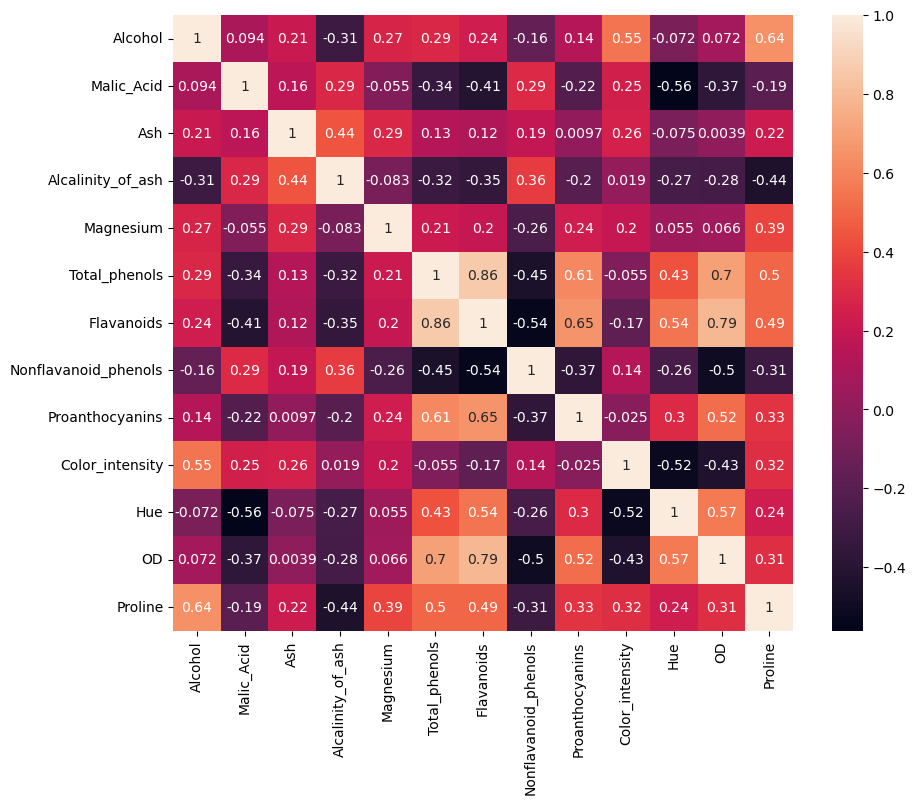

In [327]:
plt.figure(figsize =(10,8))
sns.heatmap(scaler_wine.corr(),annot=True)

In [433]:
scaler_wine.head()

Alcohol  Malic_Acid       Ash  Alcalinity_of_ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color_intensity       Hue        OD   Proline  
0         0.251717  0.362177  1.847920  1.013009  
1        -0.293321  0.406051  1.113449  0.965242  
2         0.269020  0.318304  0.788587  1.395148  
3         1.186068 -0.427544  1.184071  2.334574  
4        -0.319276  0.362177  0.449601 -0.037874

In [434]:
wine.head()

Alcohol  Malic_Acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

     OD  Proline  
0  3.92     1065  
1  3.40     1050  
2  3.17     1185  
3  3.45     1480  
4  2.93      735

## Subset formation on full wine Dataset

In [435]:
subset_wine=wine.copy()
subset_wine.head()

Alcohol  Malic_Acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

     OD  Proline  
0  3.92     1065  
1  3.40     1050  
2  3.17     1185  
3  3.45     1480  
4  2.93      735

## Removing 'Alcohol', 'Ash', 'Hue', 'Flavanoids', 'Proline' after analysis

### Removing these fields based on the basis of biplot analysis

In [436]:
subset_wine.drop(['Alcohol', 'Ash', 'Hue', 'Flavanoids', 'Proline'], axis=1, inplace=True) #Dropping Class column
subset_wine.head()

Malic_Acid  Alcalinity_of_ash  Magnesium  Total_phenols  \
0        1.71               15.6        127           2.80   
1        1.78               11.2        100           2.65   
2        2.36               18.6        101           2.80   
3        1.95               16.8        113           3.85   
4        2.59               21.0        118           2.80   

   Nonflavanoid_phenols  Proanthocyanins  Color_intensity    OD  
0                  0.28             2.29             5.64  3.92  
1                  0.26             1.28             4.38  3.40  
2                  0.30             2.81             5.68  3.17  
3                  0.24             2.18             7.80  3.45  
4                  0.39             1.82             4.32  2.93

In [437]:
scaler_subset_wine=scaler_wine.copy()
scaler_subset_wine.head()


Alcohol  Malic_Acid       Ash  Alcalinity_of_ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color_intensity       Hue        OD   Proline  
0         0.251717  0.362177  1.847920  1.013009  
1        -0.293321  0.406051  1.113449  0.965242  
2         0.269020  0.318304  0.788587  1.395148  
3         1.186068 -0.427544  1.184071  2.334574  
4        -0.319276  0.362177  0.449601 -0.037874

In [438]:
scaler_subset_wine.drop(['Alcohol', 'Ash', 'Hue', 'Flavanoids', 'Proline'], axis=1, inplace=True) #Dropping Class column
scaler_subset_wine.head()

Malic_Acid  Alcalinity_of_ash  Magnesium  Total_phenols  \
0   -0.562250          -1.169593   1.913905       0.808997   
1   -0.499413          -2.490847   0.018145       0.568648   
2    0.021231          -0.268738   0.088358       0.808997   
3   -0.346811          -0.809251   0.930918       2.491446   
4    0.227694           0.451946   1.281985       0.808997   

   Nonflavanoid_phenols  Proanthocyanins  Color_intensity        OD  
0             -0.659563         1.224884         0.251717  1.847920  
1             -0.820719        -0.544721        -0.293321  1.113449  
2             -0.498407         2.135968         0.269020  0.788587  
3             -0.981875         1.032155         1.186068  1.184071  
4              0.226796         0.401404        -0.319276  0.449601

## Hierarichal clustering on subset wine data

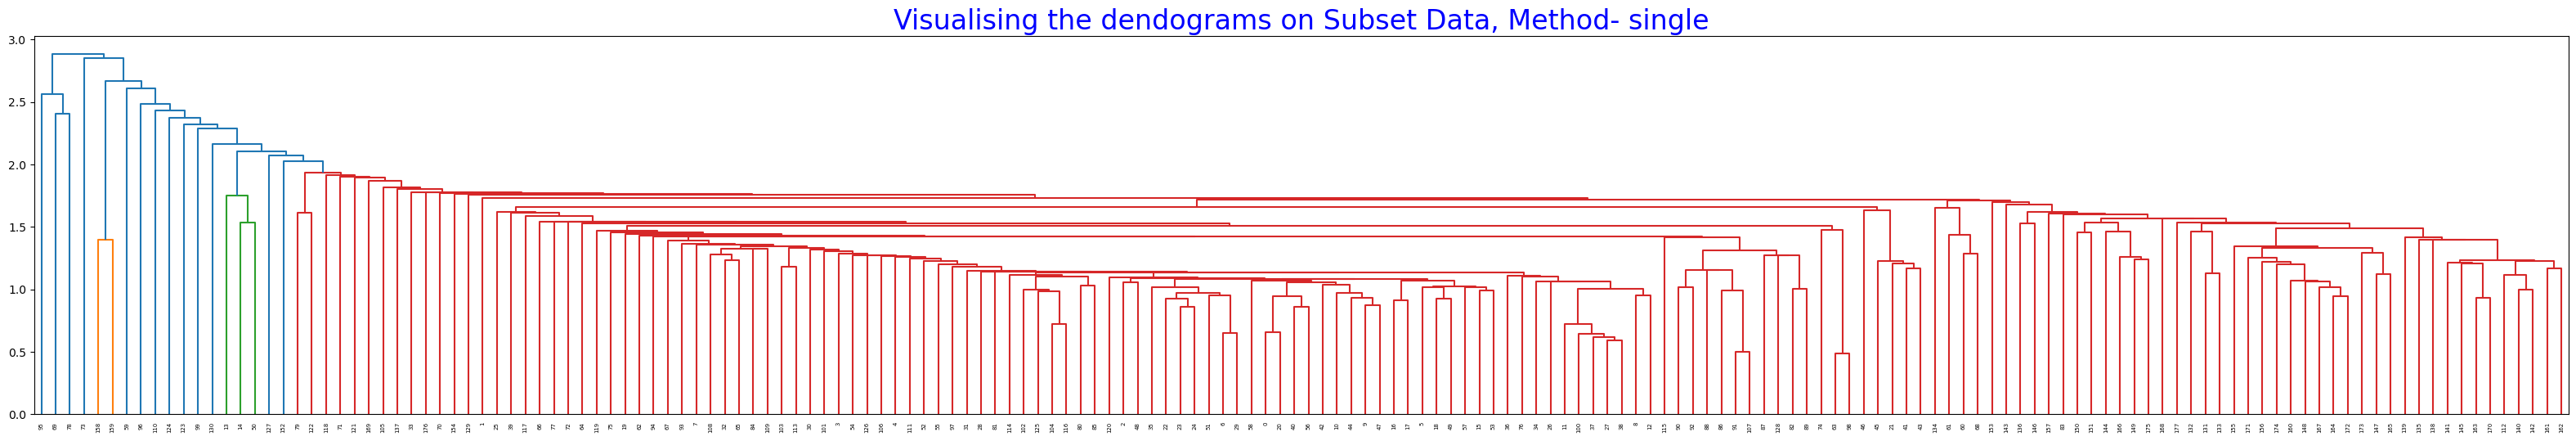

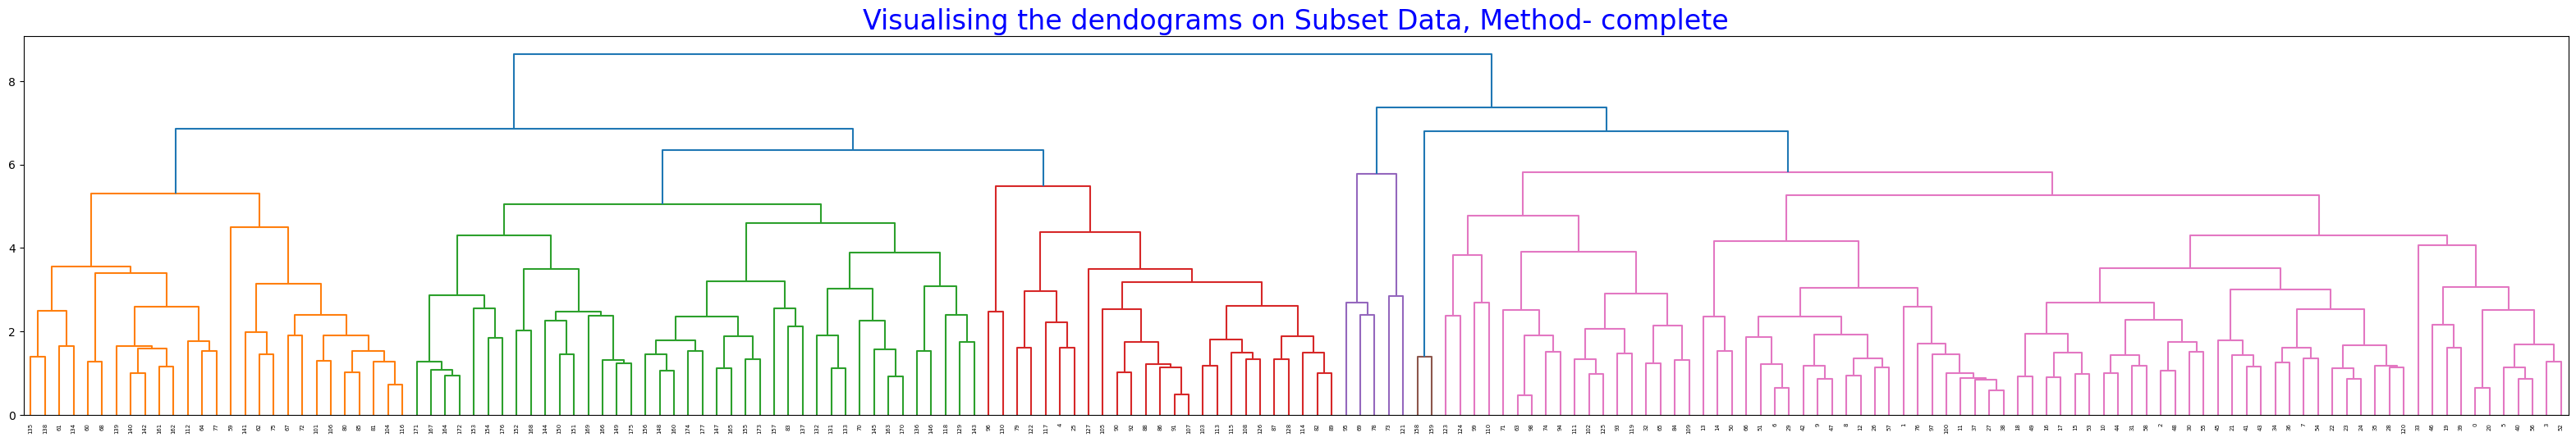

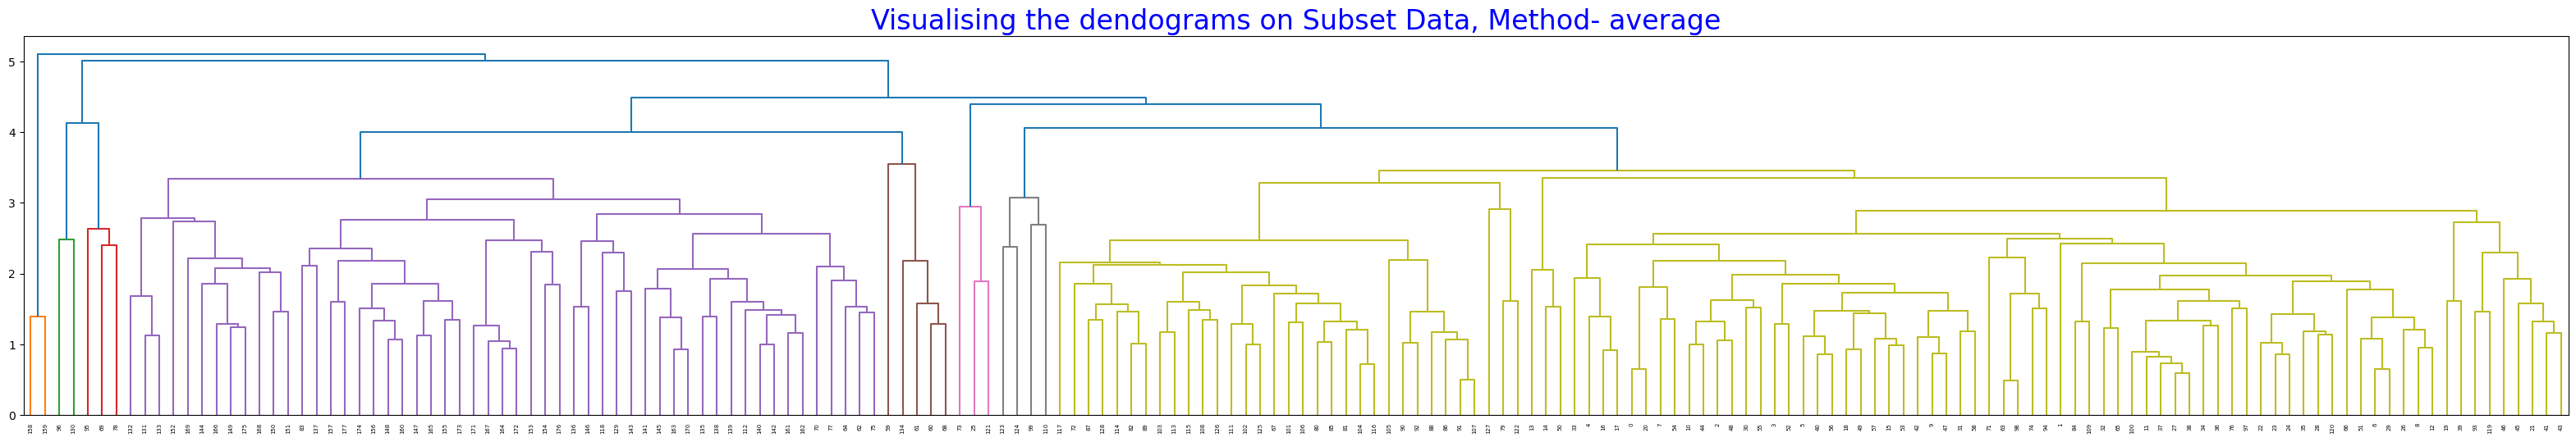

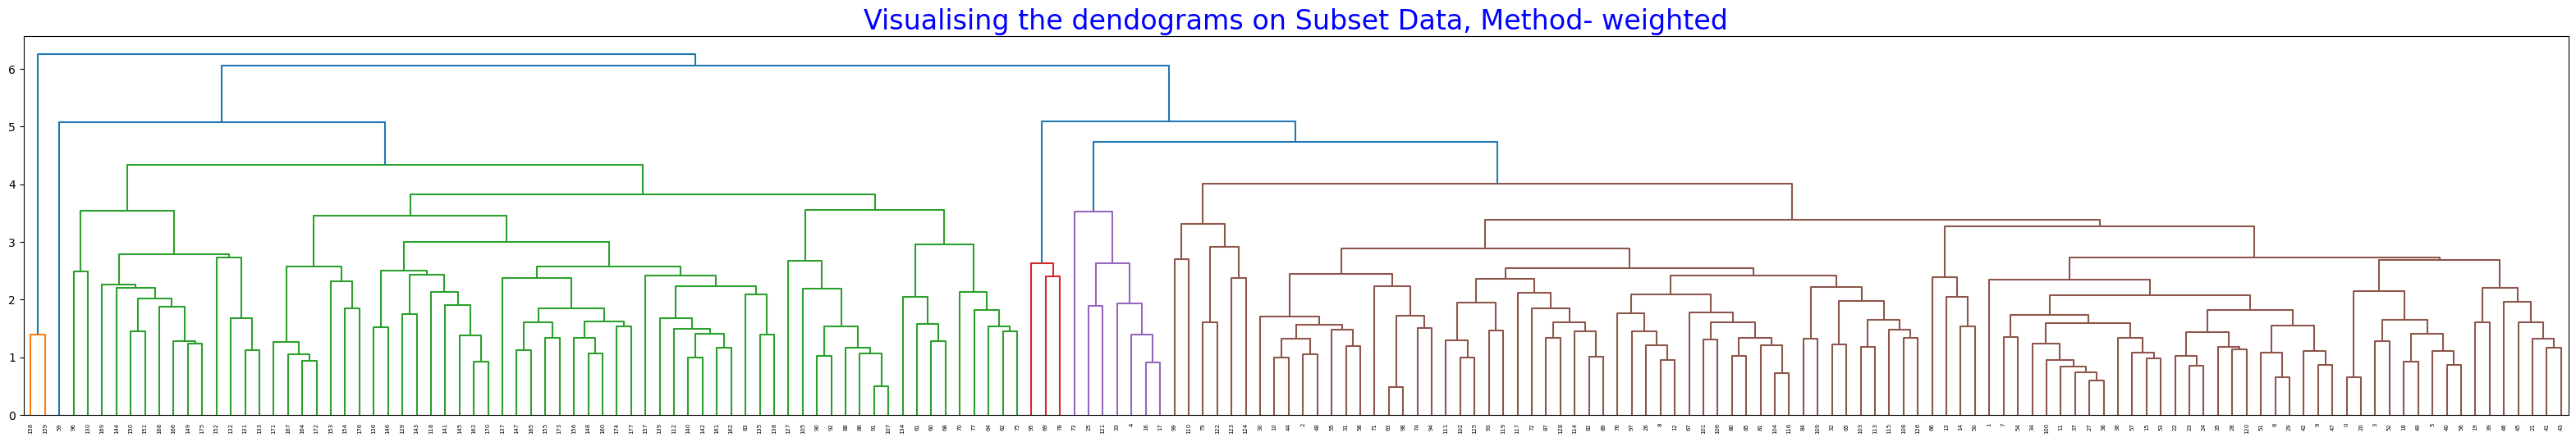

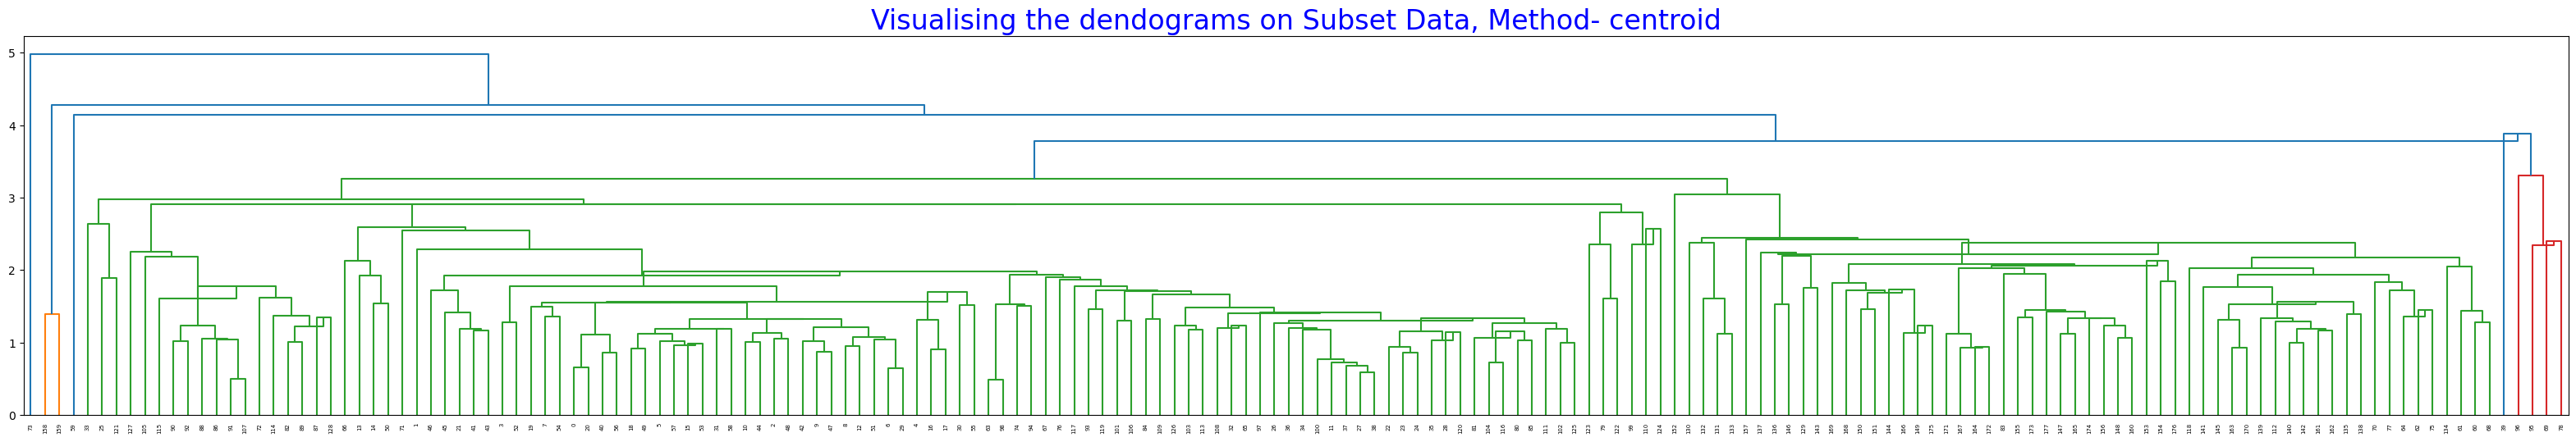

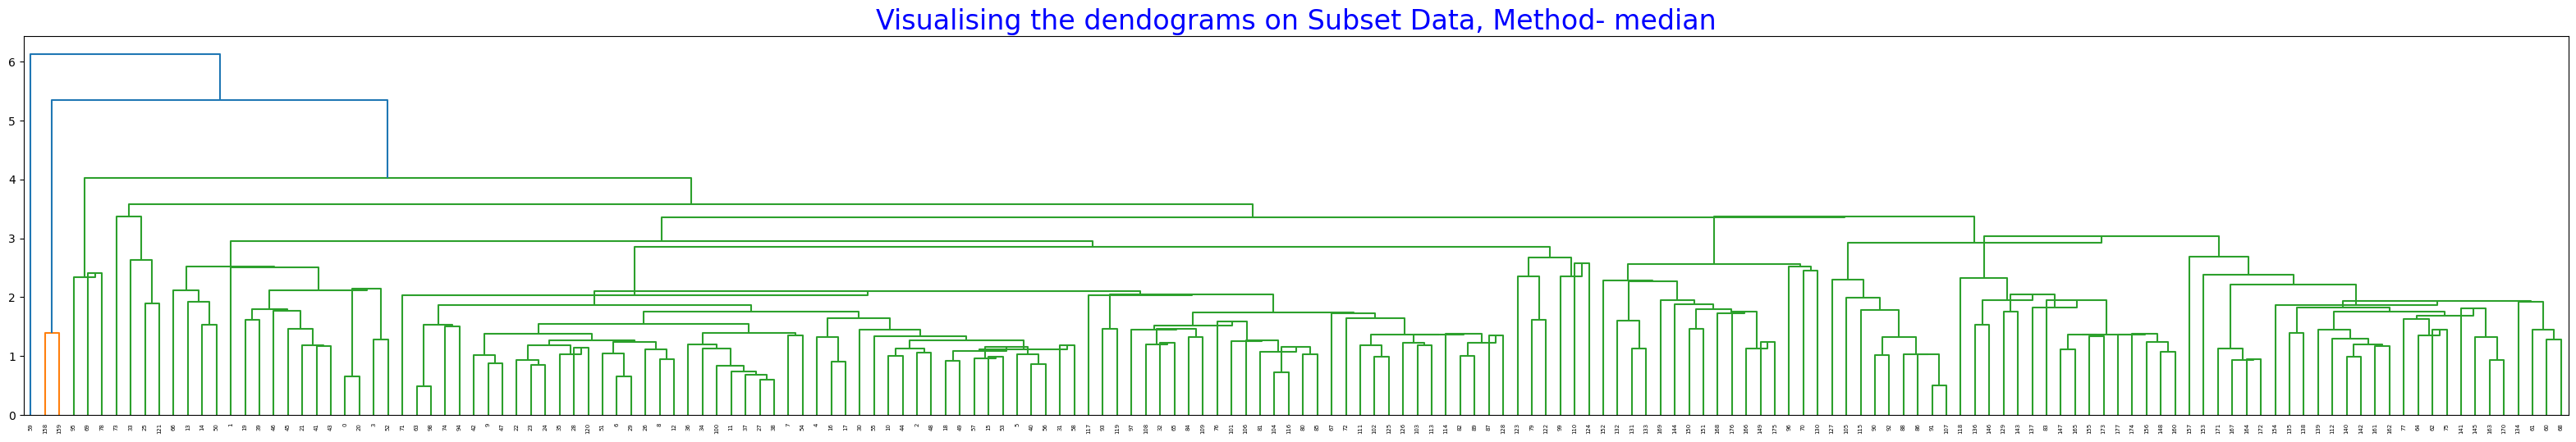

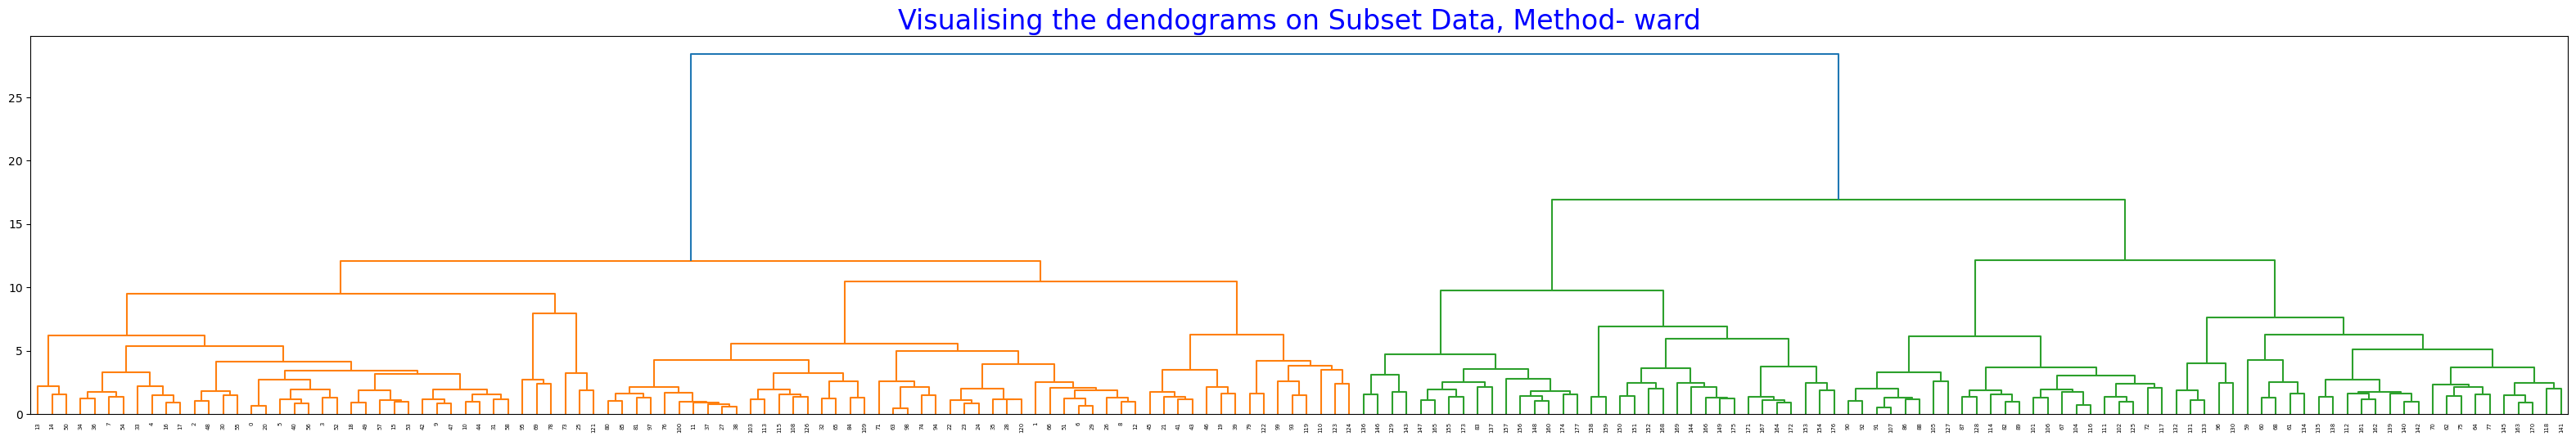

In [439]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(40, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the dendograms on Subset Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(scaler_subset_wine, method = methods,optimal_ordering=False))

## Creating Elbow graph using Kmeans on the subset data

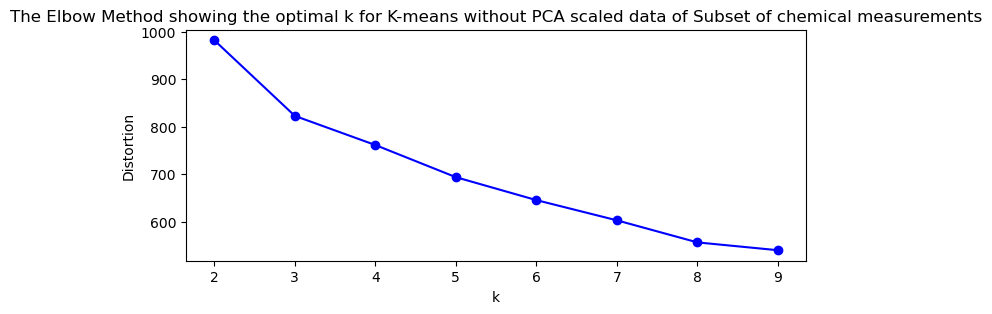

In [441]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaler_subset_wine)
    distortions.append(kmeanModel.inertia_) 
plt.figure(figsize=(8,3))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for K-means without PCA scaled data of Subset of chemical measurements')
plt.show()

## selecting 4 clusters on the basis of elbow graph

In [442]:
fit = KMeans(n_clusters=4, max_iter = 10, random_state=0).fit(scaler_subset_wine)
fit.labels_  # A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
fit.cluster_centers_ # A matrix of cluster centres.
fit.n_iter_ # The number of (outer) iterations.
fit.inertia_

755.1932031535177

## Performing PCA on the Subset data

In [443]:
pca_subset_wine_all = PCA(n_components=8).fit(scaler_subset_wine)
pca_subset_wine = PCA(n_components=2).fit(scaler_subset_wine)
x_pca_subset = pca_subset_wine.transform(subset_wine)
print("Variance explained by each of the all_components: ",'\n',pca_subset_wine_all.explained_variance_ratio_)
print("Variance explained by each of the 2_components: ",'\n',pca_subset_wine.explained_variance_ratio_)
print("Total variance explained by the 2_components: ",'\n',sum(pca_subset_wine.explained_variance_ratio_))
print("Weights of the 2_components: ",'\n',pca_subset_wine.components_)

Variance explained by each of the all_components:  
 [0.39128822 0.1702134  0.11708898 0.09686056 0.08542606 0.06353975
 0.05099947 0.02458355]
Variance explained by each of the 2_components:  
 [0.39128822 0.1702134 ]
Total variance explained by the 2_components:  
 0.5615016257171432
Weights of the 2_components:  
 [[ 0.31476819  0.28789664 -0.1584823  -0.4688025   0.40175347 -0.39848182
   0.16328182 -0.47569899]
 [-0.23839539  0.06049278 -0.59405879 -0.12606765  0.09018203 -0.21423107
  -0.68367411  0.22197145]]


## Biplot Graph on PCA  2 fields created using Subset dataSubset Data

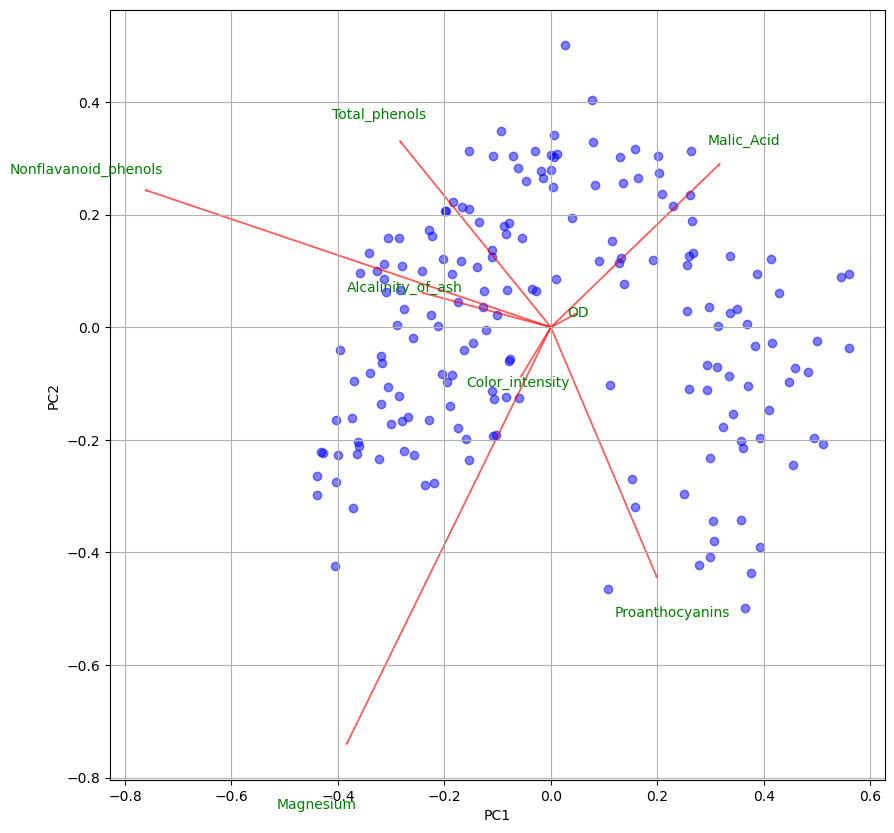

In [444]:
import matplotlib.pyplot as plt


def biplot(score, coeff, labels):
    plt.figure(figsize=(10, 10))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='b', alpha=0.5)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
            
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.show()

# Assuming you have performed PCA and obtained the results stored in 'pca' object
coeff = pca_subset_wine_all.components_
score = pca_subset_wine_all.fit_transform(scaler_subset_wine)
labels = scaler_subset_wine.columns.values.tolist()
biplot(score, coeff,labels)
